# **CLIP-Distilled ShuffleNetV2 for the Edge: Ultra-Efficient Image Captioning at Sub-0.2 GFLOPs**

### **Knowledge Distillation for Efficient Image Captioning on Flickr30k**

# 📁 **SECTION 1: Setup and Dependencies**
### Installing Required Libraries
This section installs all necessary packages including PyTorch, CLIP, NLTK, and evaluation metrics libraries.

In [ ]:
# Install required packages
!pip install transformers==4.35.0
!pip install nltk # Remove version constraint
!pip install pycocoevalcap
!pip install clip-by-openai
!pip install ftfy regex tqdm
!pip install timm

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Add download for punkt_tab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.1/123.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.35.3
    Uninstalling huggingface-hub-0.35.3:
      Successfully uninstalled huggingface-hub-0.35.3
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Install all required packages
!pip install -q transformers==4.35.0
!pip install -q nltk
!pip install -q kaggle
!pip install -q ftfy regex tqdm
!pip install -q git+https://github.com/openai/CLIP.git

# Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('wordnet')

print("✓ All dependencies installed!")

  Preparing metadata (setup.py) ... done
✓ All dependencies installed!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!wget "https://github.com/awsaf49/flickr-dataset/releases/download/v1.0/flickr30k_part00"
!wget "https://github.com/awsaf49/flickr-dataset/releases/download/v1.0/flickr30k_part01"
!wget "https://github.com/awsaf49/flickr-dataset/releases/download/v1.0/flickr30k_part02"
!cat flickr30k_part00 flickr30k_part01 flickr30k_part02 > flickr30k.zip
!rm flickr30k_part00 flickr30k_part01 flickr30k_part02
!unzip -q flickr30k.zip -d ./flickr30k
!rm flickr30k.zip
!echo "Downloaded Flickr30k dataset successfully."

--2025-10-24 18:45:06--  https://github.com/awsaf49/flickr-dataset/releases/download/v1.0/flickr30k_part00
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/753516996/b878d7ef-9eca-4c26-90d5-463215017d7a?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-24T19%3A39%3A18Z&rscd=attachment%3B+filename%3Dflickr30k_part00&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-10-24T18%3A38%3A38Z&ske=2025-10-24T19%3A39%3A18Z&sks=b&skv=2018-11-09&sig=X5oIHrDOOHGVNIWgmSDbJVoVzB32pFHgnJhwjS6cqkc%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MTMzNTEwNywibmJmIjoxNzYxMzMxNTA3LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGl

# 📁 **SECTION 2: Configuration and Hyperparameters**
### Model Configuration
Setting up all hyperparameters including:
- **Model Architecture**: Embedding dim=512, Hidden dim=512
- **Training Parameters**: Batch size=64, LR=1.5e-4, Epochs=20
- **Knowledge Distillation**: α=0.7 (feature), β=0.3 (caption), Temperature=4.0
- **Dataset Paths**: Flickr30k directory structure

In [ ]:
import torch

class Config:
    # Dataset paths
    DATASET_NAME = 'flickr30k'
    DATA_DIR = './flickr30k'
    IMAGES_DIR = './flickr30k/Images' # Corrected image directory
    CAPTIONS_FILE = './flickr30k/results.csv' # Assuming results.csv contains captions

    # Model parameters
    EMBED_DIM = 512
    HIDDEN_DIM = 512
    ATTENTION_DIM = 512
    ENCODER_DIM = 512  # Changed from 1024 to match CLIP
    VOCAB_SIZE = None  # Set after building vocabulary
    MAX_SEQ_LENGTH = 40

    # Training parameters
    BATCH_SIZE = 64
    LEARNING_RATE = 1.5e-4
    NUM_EPOCHS = 20  # Reduced for faster training
    GRAD_CLIP = 5.0

    # Knowledge distillation parameters
    DISTILL_TEMP = 4.0
    DISTILL_ALPHA = 0.7
    DISTILL_BETA = 0.3

    # Image preprocessing
    IMG_SIZE = 224
    IMG_MEAN = [0.485, 0.456, 0.406]
    IMG_STD = [0.229, 0.224, 0.225]

    # Special tokens
    PAD_TOKEN = '<pad>'
    START_TOKEN = '<start>'
    END_TOKEN = '<end>'
    UNK_TOKEN = '<unk>'

    # Vocabulary parameters
    MIN_WORD_FREQ = 3

    # Device
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Paths
    VOCAB_PATH = './vocab.pkl'
    CHECKPOINT_DIR = './checkpoints'
    BEAM_SIZE = 5

config = Config()
print(f"Device: {config.DEVICE}")
if config.DEVICE.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Device: cuda
GPU: Tesla T4


# 📁 **SECTION 3: Dataset Preparation**
### Loading and Processing Flickr30k
Downloading and preparing the Flickr30k dataset with 31,783 images split into:
- **Training**: 25,426 images (127,130 captions)
- **Validation**: 3,178 images (15,890 captions)  
- **Testing**: 3,179 images (15,895 captions)

### Building Vocabulary
Creating a vocabulary from training captions with minimum word frequency of 3, resulting in 8,798 unique tokens.

### Data Visualization
Exploring caption length distribution to set MAX_SEQ_LENGTH=40 appropriately.

In [ ]:
import pandas as pd
import os

def prepare_captions():
    """Prepare captions in a clean format"""
    print("Preparing captions...")

    captions_file = 'flickr30k/captions.txt'

    # Check if already processed
    if os.path.exists(captions_file):
        print("✓ Captions already prepared!")
        return pd.read_csv(captions_file)

    # Read raw captions
    token_file = 'flickr30k/Flickr30k.token.txt'
    if not os.path.exists(token_file):
        print(f"Error: {token_file} not found!")
        return None

    data = []
    with open(token_file, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue

            parts = line.split('\t')
            if len(parts) != 2:
                parts = line.split(maxsplit=1)
                if len(parts) != 2:
                    continue

            image_caption = parts[0]
            caption_text = parts[1]
            image_name = image_caption.split('#')[0]

            data.append({
                'image': image_name,
                'caption': caption_text
            })

    df = pd.DataFrame(data)
    df.to_csv(captions_file, index=False)

    print(f"✓ Prepared {len(df)} image-caption pairs")
    print(f"✓ Unique images: {df['image'].nunique()}")

    return df

def split_dataset():
    """Split dataset into train, val, test"""
    print("Splitting dataset...")

    df = pd.read_csv('flickr30k/captions.txt')

    # Check for official split files
    train_file = 'flickr30k/Flickr_30k.trainImages.txt'

    if os.path.exists(train_file):
        # Use official splits
        with open('flickr30k/Flickr_30k.trainImages.txt', 'r') as f:
            train_images = set([line.strip() for line in f])
        with open('flickr30k/Flickr_30k.devImages.txt', 'r') as f:
            val_images = set([line.strip() for line in f])
        with open('flickr30k/Flickr_30k.testImages.txt', 'r') as f:
            test_images = set([line.strip() for line in f])
    else:
        # Create custom 80-10-10 split
        unique_images = df['image'].unique()
        n = len(unique_images)
        n_train = int(n * 0.8)
        n_val = int(n * 0.1)

        train_images = set(unique_images[:n_train])
        val_images = set(unique_images[n_train:n_train+n_val])
        test_images = set(unique_images[n_train+n_val:])

    train_df = df[df['image'].isin(train_images)]
    val_df = df[df['image'].isin(val_images)]
    test_df = df[df['image'].isin(test_images)]

    # Save splits
    train_df.to_csv('flickr30k/train.csv', index=False)
    val_df.to_csv('flickr30k/val.csv', index=False)
    test_df.to_csv('flickr30k/test.csv', index=False)

    print(f"✓ Train: {len(train_df)} captions, {train_df['image'].nunique()} images")
    print(f"✓ Val: {len(val_df)} captions, {val_df['image'].nunique()} images")
    print(f"✓ Test: {len(test_df)} captions, {test_df['image'].nunique()} images")

    return train_df, val_df, test_df

# Run preparation
df = prepare_captions()
train_df, val_df, test_df = split_dataset()

Preparing captions...
✓ Captions already prepared!
Splitting dataset...
✓ Train: 127130 captions, 25426 images
✓ Val: 15890 captions, 3178 images
✓ Test: 15895 captions, 3179 images


In [ ]:
import pickle
import re
from collections import Counter
from nltk.tokenize import word_tokenize
import pandas as pd # Import pandas to check for NaN

class Vocabulary:
    def __init__(self, min_freq=3):
        self.word2idx = {}
        self.idx2word = {}
        self.word_freq = Counter()
        self.min_freq = min_freq

        # Special tokens
        self.pad_token = '<pad>'
        self.start_token = '<start>'
        self.end_token = '<end>'
        self.unk_token = '<unk>'

        # Add special tokens
        self.add_word(self.pad_token)
        self.add_word(self.start_token)
        self.add_word(self.end_token)
        self.add_word(self.unk_token)

    def add_word(self, word):
        if word not in self.word2idx:
            idx = len(self.word2idx)
            self.word2idx[word] = idx
            self.idx2word[idx] = word

    def __call__(self, word):
        if word not in self.word2idx:
            return self.word2idx[self.unk_token]
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

    @staticmethod
    def clean_caption(caption):
        """Clean and normalize caption"""
        # Ensure caption is a string, handle potential non-string types like float (NaN)
        if not isinstance(caption, str):
            if pd.isna(caption): # Check for NaN
                caption = "" # Replace NaN with empty string
            else:
                caption = str(caption) # Convert other non-string types to string

        caption = caption.lower()
        caption = re.sub(r'[^a-z\s]', '', caption)
        caption = ' '.join(caption.split())
        return caption

    def build_vocab(self, captions):
        """Build vocabulary from list of captions"""
        print("Building vocabulary...")

        for caption in captions:
            caption = self.clean_caption(caption)
            tokens = word_tokenize(caption)
            self.word_freq.update(tokens)

        for word, freq in self.word_freq.items():
            if freq >= self.min_freq:
                self.add_word(word)

        print(f"✓ Vocabulary size: {len(self)}")
        print(f"✓ Words with freq >= {self.min_freq}: {len(self) - 4}")

    def encode_caption(self, caption, max_length=40):
        """Convert caption to list of indices"""
        caption = self.clean_caption(caption)
        tokens = word_tokenize(caption)
        tokens = [self.start_token] + tokens + [self.end_token]

        indices = [self(token) for token in tokens]

        if len(indices) < max_length:
            indices += [self(self.pad_token)] * (max_length - len(indices))
        else:
            indices = indices[:max_length-1] + [self(self.end_token)]

        return indices

    def decode_caption(self, indices, skip_special=True):
        """Convert indices back to caption"""
        words = []
        for idx in indices:
            word = self.idx2word[idx]
            if skip_special and word in [self.pad_token, self.start_token, self.end_token]:
                if word == self.end_token:
                    break
                continue
            words.append(word)
        return ' '.join(words)

    def save(self, path):
        with open(path, 'wb') as f:
            pickle.dump(self, f)
        print(f"✓ Vocabulary saved to {path}")

    @staticmethod
    def load(path):
        with open(path, 'rb') as f:
            vocab = pickle.load(f)
        print(f"✓ Vocabulary loaded from {path}")
        return vocab

# Build vocabulary
if os.path.exists(config.VOCAB_PATH):
    vocab = Vocabulary.load(config.VOCAB_PATH)
else:
    vocab = Vocabulary(min_freq=config.MIN_WORD_FREQ)
    # Ensure train_df is not None before accessing 'caption'
    if train_df is not None:
        captions = train_df['caption'].tolist()
        vocab.build_vocab(captions)
        vocab.save(config.VOCAB_PATH)
    else:
        print("Error: train_df is None. Cannot build vocabulary.")


if 'vocab' in locals() and vocab is not None:
    config.VOCAB_SIZE = len(vocab)
    print(f"\n✓ Vocabulary ready with {len(vocab)} words")
else:
    config.VOCAB_SIZE = None
    print("\n✗ Vocabulary not built due to previous errors.")

Building vocabulary...
✓ Vocabulary size: 8798
✓ Words with freq >= 3: 8794
✓ Vocabulary saved to ./vocab.pkl

✓ Vocabulary ready with 8798 words


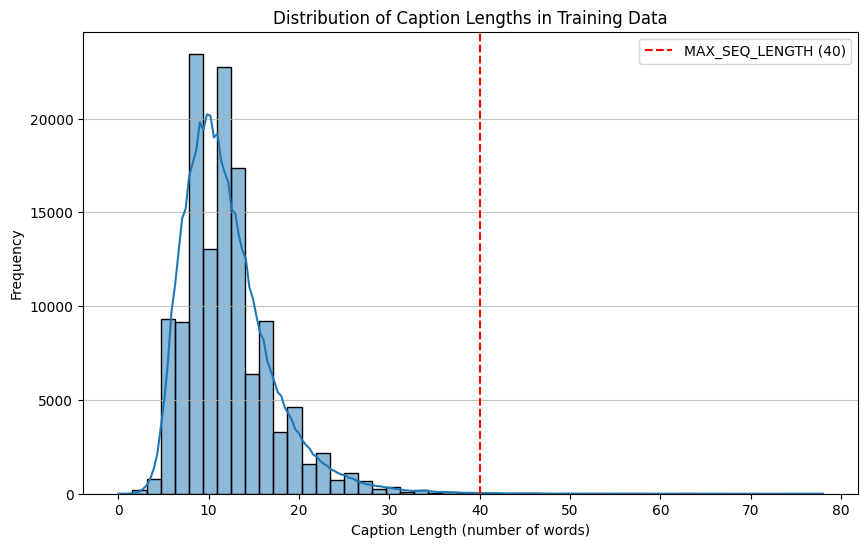

Average caption length: 12.05
Median caption length: 11.00
Max caption length: 78
Min caption length: 0
Number of captions longer than 40: 125


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure train_df is loaded
if 'train_df' not in locals():
    print("Loading train_df to plot caption length distribution...")
    try:
        train_df = pd.read_csv('flickr30k/train.csv')
    except FileNotFoundError:
        print("Error: flickr30k/train.csv not found. Please run the data preparation cells.")
        train_df = None

if train_df is not None:
    # Calculate caption lengths (after cleaning)
    # Use the clean_caption method from the Vocabulary class if available,
    # otherwise use a simple split and count.
    if 'vocab' in locals() and vocab is not None:
        caption_lengths = train_df['caption'].apply(lambda x: len(vocab.clean_caption(x).split()))
    else:
        print("Warning: Vocabulary not available. Using simple split for caption length calculation.")
        caption_lengths = train_df['caption'].apply(lambda x: len(str(x).split())) # Handle potential non-string types


    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(caption_lengths, bins=50, kde=True)
    plt.title('Distribution of Caption Lengths in Training Data')
    plt.xlabel('Caption Length (number of words)')
    plt.ylabel('Frequency')
    plt.axvline(x=config.MAX_SEQ_LENGTH, color='r', linestyle='--', label=f'MAX_SEQ_LENGTH ({config.MAX_SEQ_LENGTH})')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    print(f"Average caption length: {caption_lengths.mean():.2f}")
    print(f"Median caption length: {caption_lengths.median():.2f}")
    print(f"Max caption length: {caption_lengths.max()}")
    print(f"Min caption length: {caption_lengths.min()}")
    print(f"Number of captions longer than {config.MAX_SEQ_LENGTH}: {sum(caption_lengths > config.MAX_SEQ_LENGTH)}")

else:
    print("Cannot plot caption length distribution as train_df is not available.")


Visualizing word distribution...


/tmp/ipython-input-785774721.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word for word, count in most_common_words],


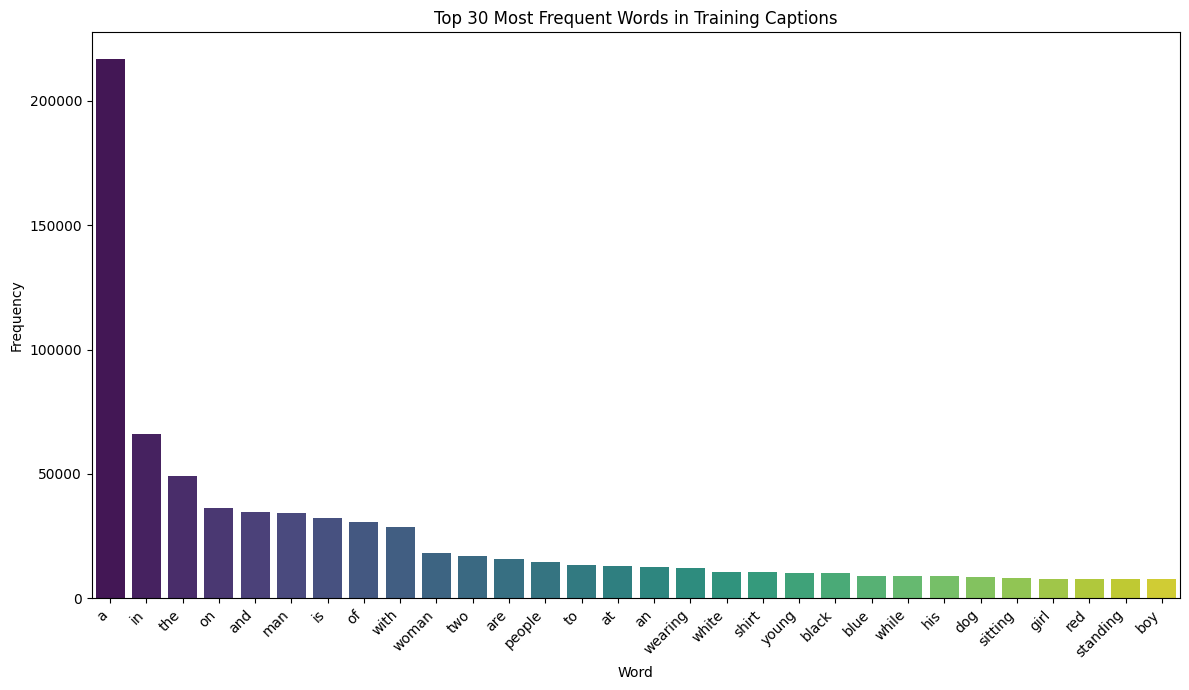


Most Frequent Words:
- a: 216784
- in: 65881
- the: 49085
- on: 36096
- and: 34611
- man: 34403
- is: 32198
- of: 30745
- with: 28486
- woman: 18198
- two: 16925
- are: 15701
- people: 14470
- to: 13452
- at: 13099
- an: 12412
- wearing: 12219
- white: 10504
- shirt: 10447
- young: 10309
- black: 9961
- blue: 8848
- while: 8807
- his: 8786
- dog: 8314
- sitting: 8135
- girl: 7843
- red: 7810
- standing: 7691
- boy: 7595

Generating wordcloud...


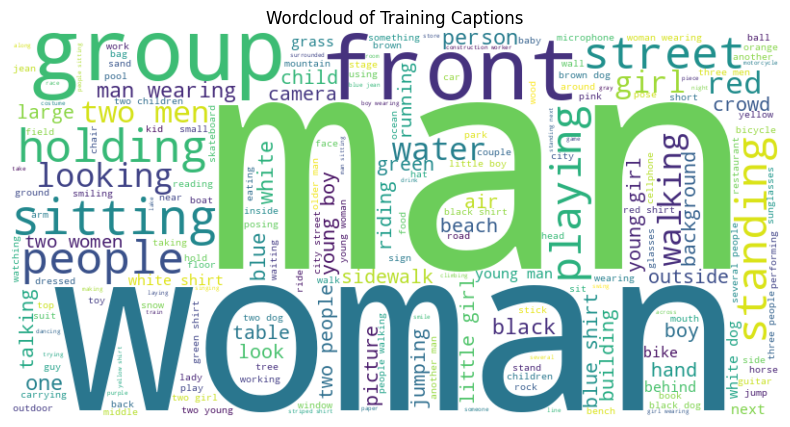

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re # Import regex for cleaning

# Ensure train_df and vocab are available
if 'train_df' not in locals():
    print("Loading train_df for word analysis...")
    try:
        train_df = pd.read_csv('flickr30k/train.csv')
    except FileNotFoundError:
        print("Error: flickr30k/train.csv not found. Please run the data preparation cells.")
        train_df = None

# Ensure vocab is available or define a basic cleaning function if not
if 'vocab' not in locals() or vocab is None:
    print("Warning: Vocabulary not found. Using a basic cleaning function for word analysis.")
    def clean_caption_basic(caption):
        if not isinstance(caption, str):
            if pd.isna(caption):
                caption = ""
            else:
                caption = str(caption)
        caption = caption.lower()
        caption = re.sub(r'[^a-z\s]', '', caption)
        caption = ' '.join(caption.split())
        return caption
    clean_func = clean_caption_basic
else:
    clean_func = vocab.clean_caption

if train_df is not None:
    # Collect all words from cleaned captions
    all_words = []
    print("Collecting and counting words from captions...")
    for caption in train_df['caption']:
        cleaned_caption = clean_func(caption)
        all_words.extend(cleaned_caption.split())

    # Calculate word frequencies
    word_counts = Counter(all_words)

    # --- Visualize Word Distribution and Most Frequent Words ---
    print("\nVisualizing word distribution...")
    # Get the most common words
    most_common_words = word_counts.most_common(30) # Top 30 words

    plt.figure(figsize=(12, 7))
    sns.barplot(x=[word for word, count in most_common_words],
                y=[count for word, count in most_common_words], palette='viridis')
    plt.title('Top 30 Most Frequent Words in Training Captions')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("\nMost Frequent Words:")
    for word, count in most_common_words:
        print(f"- {word}: {count}")


    # --- Generate and Visualize Wordcloud ---
    print("\nGenerating wordcloud...")
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Wordcloud of Training Captions')
    plt.show()

else:
    print("\nCannot perform word analysis as train_df is not available.")

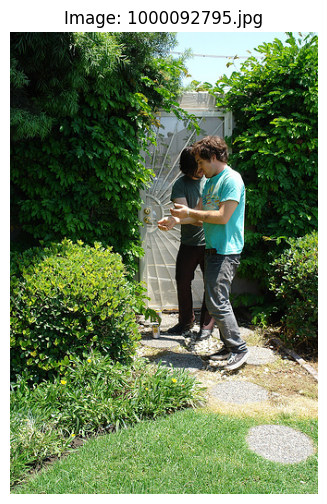


All captions for 1000092795.jpg:
1:  Two young guys with shaggy hair look at their hands while hanging out in the yard .
2:  Two young , White males are outside near many bushes .
3:  Two men in green shirts are standing in a yard .
4:  A man in a blue shirt standing in a garden .
5:  Two friends enjoy time spent together .


In [ ]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

# Ensure df is loaded (assuming it was created in previous data preparation steps)
if 'df' not in locals():
    print("Loading the full captions DataFrame...")
    try:
        df = pd.read_csv('flickr30k/captions.txt') # Assuming this is the file with all captions
    except FileNotFoundError:
        print("Error: flickr30k/captions.txt not found. Please run the data preparation cells.")
        df = None

if df is not None:
    # --- Specify the image file name here ---
    # You can find image names in your flickr30k/Images directory or in the 'image' column of your dataframes.
    image_file_name = '1000092795.jpg' # Replace with the image name you want to see

    # --- Display the image and its captions ---
    img_path = os.path.join(config.IMAGES_DIR, image_file_name) # Use config.IMAGES_DIR

    if os.path.exists(img_path):
        try:
            image = Image.open(img_path).convert('RGB')
            plt.figure(figsize=(6, 6))
            plt.imshow(image)
            plt.axis('off')
            plt.title(f"Image: {image_file_name}", fontsize=12)
            plt.show()

            # Get all captions for this image
            image_captions = df[df['image'] == image_file_name]['caption'].tolist()

            print(f"\nAll captions for {image_file_name}:")
            if image_captions:
                for i, caption in enumerate(image_captions):
                    print(f"{i+1}: {caption}")
            else:
                print("No captions found for this image in the DataFrame.")

        except Exception as e:
            print(f"Error displaying image or captions for {image_file_name}: {e}")
    else:
        print(f"Error: Image file not found at {img_path}")

else:
    print("Cannot display captions as the DataFrame is not available.")

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

class FlickrDataset(Dataset): # Changed class name from Flickr8kDataset
    def __init__(self, dataframe, vocab, images_dir, transform=None, max_length=40):
        self.df = dataframe.reset_index(drop=True)
        self.vocab = vocab
        self.images_dir = images_dir
        self.transform = transform
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_name = row['image']
        caption = row['caption']

        # Load image
        image_path = os.path.join(self.images_dir, image_name)
        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        # Encode caption
        caption_encoded = self.vocab.encode_caption(caption, self.max_length)
        caption_tensor = torch.tensor(caption_encoded, dtype=torch.long)

        # Calculate length
        caption_length = sum([1 for t in caption_encoded if t != self.vocab(self.vocab.pad_token)])

        return {
            'image': image,
            'caption': caption_tensor,
            'caption_length': caption_length,
            'image_name': image_name
        }

def get_transforms(mode='train'):
    if mode == 'train':
        return transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=config.IMG_MEAN, std=config.IMG_STD)
        ])
    else:
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=config.IMG_MEAN, std=config.IMG_STD)
        ])

# Create datasets
train_dataset = FlickrDataset(train_df, vocab, config.IMAGES_DIR, get_transforms('train')) # Changed class name
val_dataset = FlickrDataset(val_df, vocab, config.IMAGES_DIR, get_transforms('val'))     # Changed class name
test_dataset = FlickrDataset(test_df, vocab, config.IMAGES_DIR, get_transforms('test'))   # Changed class name

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=config.BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=config.BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=config.BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

print(f"✓ Train batches: {len(train_loader)}")
print(f"✓ Val batches: {len(val_loader)}")
print(f"✓ Test batches: {len(test_loader)}")

✓ Train batches: 1987
✓ Val batches: 249
✓ Test batches: 249


# 📁 **SECTION 4: Model Architecture**
### Teacher Model: CLIP ViT-B/32 (Frozen)
Loading the pre-trained CLIP vision encoder with 85M parameters. This provides rich visual-semantic features but is too large for edge deployment.

### Student Model: ShuffleNetV2 (Trainable)
Our lightweight student encoder with only 2.04M parameters (98% reduction) designed for efficiency:
- Uses depthwise separable convolutions
- Channel shuffling for information flow
- Preserves 49 spatial locations (7×7) for attention
- **Key Innovation**: Maintains spatial structure for attention-based decoding

### Decoder: LSTM with Bahdanau Attention
Generates captions word-by-word using:
- 512-dimensional hidden states
- Bahdanau attention over 49 spatial features
- 8,798-token vocabulary
- Total decoder parameters: 13.22M


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import clip

class TeacherEncoder(nn.Module):
    """Teacher model using frozen CLIP"""
    def __init__(self, device='cuda'):
        super(TeacherEncoder, self).__init__()
        self.device = device
        self.clip_model, self.preprocess = clip.load("ViT-B/32", device=device)

        # Freeze CLIP
        for param in self.clip_model.parameters():
            param.requires_grad = False

        self.embed_dim = 512
        print(f"✓ Teacher (CLIP ViT-B/32) loaded")

    def forward(self, images):
        with torch.no_grad():
            features = self.clip_model.encode_image(images)
            features = features.float()
        return features

class StudentEncoder(nn.Module):
    """Student model using ShuffleNetV2 (with spatial features for attention)"""
    def __init__(self, embed_dim=512):
        super(StudentEncoder, self).__init__()

        shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
        # Discard classification head, retain convolutional trunk
        self.features = nn.Sequential(*list(shufflenet.children())[:-1])
        # Do NOT use global pooling here!
        self.projection = nn.Sequential(
            nn.Linear(1024, embed_dim),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(embed_dim, embed_dim)
        )
        self.embed_dim = embed_dim
        total_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print(f"✓ Student (ShuffleNetV2) loaded - {total_params:,} parameters")

    def forward(self, images):
        features = self.features(images)  # (B, 1024, H, W)
        B, C, H, W = features.size()
        # Flatten spatial map for attention: (B, H*W, 1024)
        features = features.view(B, C, H * W).transpose(1, 2)
        # Project each patch embedding separately
        features = self.projection(features)  # (B, H*W, embed_dim)
        return features

class BahdanauAttention(nn.Module):
    """Bahdanau Attention for (B, N, D) input sequence"""
    def __init__(self, encoder_dim, decoder_dim, attention_dim):
        super(BahdanauAttention, self).__init__()
        self.encoder_att = nn.Linear(encoder_dim, attention_dim)
        self.decoder_att = nn.Linear(decoder_dim, attention_dim)
        self.full_att = nn.Linear(attention_dim, 1)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, encoder_out, decoder_hidden):
        # encoder_out: (B, N, D), decoder_hidden: (B, D_h)
        att1 = self.encoder_att(encoder_out)        # (B, N, attention_dim)
        att2 = self.decoder_att(decoder_hidden).unsqueeze(1)  # (B, 1, attention_dim)
        att = self.full_att(self.relu(att1 + att2)).squeeze(2)  # (B, N)
        alpha = self.softmax(att)                   # (B, N)
        context_vector = (encoder_out * alpha.unsqueeze(2)).sum(dim=1)  # (B, D)
        return alpha, context_vector

class DecoderWithAttention(nn.Module):
    """LSTM Decoder with Attention"""
    def __init__(self, embed_dim, decoder_dim, attention_dim, vocab_size, encoder_dim, dropout=0.5):
        super(DecoderWithAttention, self).__init__()

        self.encoder_dim = encoder_dim
        self.decoder_dim = decoder_dim
        self.vocab_size = 8798
        self.embed_dim = embed_dim

        self.attention = BahdanauAttention(encoder_dim, decoder_dim, attention_dim)
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.dropout = nn.Dropout(dropout)
        self.lstm = nn.LSTMCell(embed_dim + encoder_dim, decoder_dim)
        self.init_h = nn.Linear(encoder_dim, decoder_dim)
        self.init_c = nn.Linear(encoder_dim, decoder_dim)
        self.fc = nn.Linear(decoder_dim, vocab_size)

        self.embedding.weight.data.uniform_(-0.1, 0.1)
        self.fc.bias.data.fill_(0)
        self.fc.weight.data.uniform_(-0.1, 0.1)

    def init_hidden_state(self, encoder_out):
        # encoder_out: (B, N, encoder_dim)
        mean_encoder_out = encoder_out.mean(dim=1)  # (B, encoder_dim)
        h = self.init_h(mean_encoder_out)           # (B, decoder_dim)
        c = self.init_c(mean_encoder_out)
        return h, c

    def forward(self, encoder_out, captions, caption_lengths):
        batch_size = encoder_out.size(0)

        caption_lengths, sort_ind = caption_lengths.squeeze(1).sort(dim=0, descending=True)
        encoder_out = encoder_out[sort_ind]
        captions = captions[sort_ind]

        embeddings = self.embedding(captions)
        h, c = self.init_hidden_state(encoder_out)

        decode_lengths = (caption_lengths - 1).tolist()
        max_decode_length = max(decode_lengths)
        predictions = torch.zeros(batch_size, max_decode_length, self.vocab_size).to(encoder_out.device)
        # Store attention weights for visualization or loss
        alphas = torch.zeros(batch_size, max_decode_length, encoder_out.size(1)).to(encoder_out.device)

        for t in range(max_decode_length):
            batch_size_t = sum([l > t for l in decode_lengths])
            attention_weights, context_vector = self.attention(
                encoder_out[:batch_size_t], h[:batch_size_t]
            )
            lstm_input = torch.cat([embeddings[:batch_size_t, t, :], context_vector], dim=1)
            h, c = self.lstm(lstm_input, (h[:batch_size_t], c[:batch_size_t]))
            preds = self.fc(self.dropout(h))
            predictions[:batch_size_t, t, :] = preds
            alphas[:batch_size_t, t, :] = attention_weights

        return predictions, alphas, captions, decode_lengths, sort_ind

class ImageCaptioningModel(nn.Module):
    """Complete model"""
    def __init__(self, encoder, decoder):
        super(ImageCaptioningModel, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, images, captions, caption_lengths):
        features = self.encoder(images)  # (B, H*W, embed_dim)
        predictions, alphas, sorted_captions, decode_lengths, sort_ind = self.decoder(
            features, captions, caption_lengths
        )
        return predictions, alphas, sorted_captions, decode_lengths, sort_ind

# ================= Model Initialization ================

print("\nInitializing models...")
teacher_encoder = TeacherEncoder(device=config.DEVICE).to(config.DEVICE)
student_encoder = StudentEncoder(embed_dim=config.ENCODER_DIM).to(config.DEVICE)
decoder = DecoderWithAttention(
    embed_dim=config.EMBED_DIM,
    decoder_dim=config.HIDDEN_DIM,
    attention_dim=config.ATTENTION_DIM,
    vocab_size=8798,
    encoder_dim=config.ENCODER_DIM,
    dropout=0.2
).to(config.DEVICE)

student_model = ImageCaptioningModel(student_encoder, decoder).to(config.DEVICE)
print("✓ All models initialized!")



Initializing models...


100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 51.6MiB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✓ Teacher (CLIP ViT-B/32) loaded
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth


100%|██████████| 8.79M/8.79M [00:00<00:00, 198MB/s]

✓ Student (ShuffleNetV2) loaded - 2,041,060 parameters


✓ All models initialized!


# 📁 **SECTION 5: Knowledge Distillation Strategy**
### Dual-Level Distillation Loss
Our training approach combines two complementary objectives:

**1. Feature-Level Distillation (α=0.7)**
- Aligns student encoder features with CLIP teacher features
- Uses L2 (MSE) distance
- Dominant loss component for learning visual-semantic representations

**2. Task-Level Distillation (β=0.3)**  
- Cross-entropy loss for caption generation
- Temperature=4.0 for soft probability distributions
- Ensures task-specific performance

**Combined Loss**: `L_total = 0.7 × L_feature + 0.3 × L_caption`

In [ ]:
from torch.nn.utils.rnn import pack_padded_sequence
from tqdm import tqdm
import torch.optim as optim
import torch.nn.functional as F # Import F for pooling

class DistillationLoss(nn.Module):
    def __init__(self, temperature=4.0, alpha=0.7, beta=0.3):
        super(DistillationLoss, self).__init__()
        self.temperature = temperature
        self.alpha = alpha
        self.beta = beta
        self.ce_loss = nn.CrossEntropyLoss(ignore_index=0)
        # Feature distillation loss will be calculated outside this module now

    def forward(self, predictions, targets, decode_lengths):
        # Feature distillation loss is handled in the training loop
        predictions_packed = pack_padded_sequence(predictions, decode_lengths, batch_first=True)[0]
        targets_packed = pack_padded_sequence(targets, decode_lengths, batch_first=True)[0]
        caption_loss = self.ce_loss(predictions_packed, targets_packed)

        # Total loss calculation will be done in the training loop
        return caption_loss


def train_epoch(teacher_encoder, student_model, train_loader, criterion, optimizer, device):
    student_model.train()
    teacher_encoder.eval()

    epoch_loss = 0
    feature_distill_loss_sum = 0
    caption_loss_sum = 0

    progress_bar = tqdm(train_loader, desc='Training')

    for batch in progress_bar:
        images = batch['image'].to(device)
        captions = batch['caption'].to(device)
        caption_lengths = batch['caption_length'].to(device).unsqueeze(1)

        # Get teacher features (2D)
        with torch.no_grad():
            teacher_features = teacher_encoder(images) # (batch_size, embed_dim)

        # Get student features (3D spatial features)
        student_spatial_features = student_model.encoder(images) # (batch_size, num_features, embed_dim)

        # Generate caption predictions from the student model (decoder uses spatial features)
        predictions, alphas, sorted_captions, decode_lengths, sort_ind = student_model.decoder(
            student_spatial_features, captions, caption_lengths
        )

        # Sort teacher features to match the sorted captions
        teacher_features_sorted = teacher_features[sort_ind] # (batch_size, embed_dim)

        # For feature distillation, pool student spatial features to match teacher feature shape (2D)
        # Assuming student_spatial_features shape is (batch_size, num_features, embed_dim)
        # Need to rearrange to (batch_size, embed_dim, num_features) for pooling if num_features is spatial dim
        # Let's re-check StudentEncoder output shape in cell Ij6wRqpw8ap6
        # StudentEncoder outputs (batch_size, embed_dim, H', W') before reshaping to (batch_size, H'*W', embed_dim)
        # So student_spatial_features here should be (batch_size, num_features, embed_dim)

        # Pool along the 'num_features' dimension (dimension 1) to get (batch_size, embed_dim)
        student_features_pooled = torch.mean(student_spatial_features, dim=1) # (batch_size, embed_dim)


        # Calculate feature distillation loss (MSE between pooled student features and teacher features)
        feature_distill_loss = F.mse_loss(student_features_pooled, teacher_features_sorted)

        # Calculate captioning loss
        targets = sorted_captions[:, 1:] # Shift targets by one (remove <start>)
        caption_loss = criterion(predictions, targets, decode_lengths)

        # Combine losses
        loss = criterion.alpha * feature_distill_loss + criterion.beta * caption_loss

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(student_model.parameters(), config.GRAD_CLIP)
        optimizer.step()

        epoch_loss += loss.item()
        feature_distill_loss_sum += feature_distill_loss.item()
        caption_loss_sum += caption_loss.item()

        progress_bar.set_postfix({
            'total_loss': f'{loss.item():.4f}',
            'feat_loss': f'{feature_distill_loss.item():.4f}',
            'cap_loss': f'{caption_loss.item():.4f}'
        })

    return epoch_loss / len(train_loader), feature_distill_loss_sum / len(train_loader), caption_loss_sum / len(train_loader)


def validate(teacher_encoder, student_model, val_loader, criterion, device):
    student_model.eval()
    teacher_encoder.eval()
    total_loss = 0
    feature_distill_loss_sum = 0
    caption_loss_sum = 0


    with torch.no_grad():
        for batch in val_loader:
            images = batch['image'].to(device)
            captions = batch['caption'].to(device)
            caption_lengths = batch['caption_length'].to(device).unsqueeze(1)

            teacher_features = teacher_encoder(images)
            student_spatial_features = student_model.encoder(images)
            predictions, alphas, sorted_captions, decode_lengths, sort_ind = student_model.decoder(
                student_spatial_features, captions, caption_lengths
            )

            teacher_features_sorted = teacher_features[sort_ind]
            student_features_pooled = torch.mean(student_spatial_features, dim=1) # Pool for feature loss

            feature_distill_loss = F.mse_loss(student_features_pooled, teacher_features_sorted)
            targets = sorted_captions[:, 1:]
            caption_loss = criterion(predictions, targets, decode_lengths)

            loss = criterion.alpha * feature_distill_loss + criterion.beta * caption_loss

            total_loss += loss.item()
            feature_distill_loss_sum += feature_distill_loss.item()
            caption_loss_sum += caption_loss.item()


    return total_loss / len(val_loader), feature_distill_loss_sum / len(val_loader), caption_loss_sum / len(val_loader)

print("✓ Training functions ready!")

✓ Training functions ready!


# 📁 **SECTION 6: Training Loop**
###Training (Epochs 1-20)
Training with:
- AdamW optimizer
- Learning rate: 1.5e-4
- Gradient clipping: 5.0
- ReduceLROnPlateau scheduler

Best model saved at **Epoch 13** with validation loss: **1.0097**

In [ ]:
# Create checkpoint directory
os.makedirs(config.CHECKPOINT_DIR, exist_ok=True)

# Setup training
criterion = DistillationLoss(temperature=config.DISTILL_TEMP, alpha=config.DISTILL_ALPHA, beta=config.DISTILL_BETA)
optimizer = optim.AdamW(student_model.parameters(), lr=config.LEARNING_RATE, weight_decay=1e-4)

# ✅ NEW: Add Learning Rate Scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',           # Minimize validation loss
    factor=0.5,           # Reduce LR by half
    patience=5,           # Wait 5 epochs before reducing
    min_lr=1e-6          # Don't go below this
)

# Training loop
print("="*70)
print("STARTING TRAINING")
print("="*70)

best_val_loss = float('inf')
train_losses = []
val_losses = []

for epoch in range(config.NUM_EPOCHS):
    print(f"\nEpoch {epoch+1}/{config.NUM_EPOCHS}")

    # Train
    train_loss, train_feat_loss, train_cap_loss = train_epoch(teacher_encoder, student_model, train_loader, criterion, optimizer, config.DEVICE)
    train_losses.append(train_loss)

    # Validate
    val_loss, val_feat_loss, val_cap_loss = validate(teacher_encoder, student_model, val_loader, criterion, config.DEVICE)
    val_losses.append(val_loss)

    # ✅ NEW: Update learning rate based on validation loss - pass only the total validation loss
    scheduler.step(val_loss)
    current_lr = optimizer.param_groups[0]['lr']

    # ✅ MODIFIED: Show learning rate
    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | LR: {current_lr:.6f}")


    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save({
            'epoch': epoch + 1,
            'state_dict': student_model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'val_loss': val_loss
        }, f'{config.CHECKPOINT_DIR}/best_model.pth')
        print(f"✓ Best model saved!")

print("\n" + "="*70)
print("TRAINING COMPLETE!")
print("="*70)

STARTING TRAINING

Epoch 1/20


Training: 100%|██████████| 1987/1987 [14:31<00:00,  2.28it/s, total_loss=1.1528, feat_loss=0.1086, cap_loss=3.5892]


Train Loss: 1.1585 | Val Loss: 1.1686 | LR: 0.000150
✓ Best model saved!

Epoch 2/20


Training: 100%|██████████| 1987/1987 [14:14<00:00,  2.33it/s, total_loss=1.1770, feat_loss=0.1044, cap_loss=3.6797]


Train Loss: 1.0737 | Val Loss: 1.1147 | LR: 0.000150
✓ Best model saved!

Epoch 3/20


Training: 100%|██████████| 1987/1987 [14:12<00:00,  2.33it/s, total_loss=0.9811, feat_loss=0.1060, cap_loss=3.0229]


Train Loss: 1.0209 | Val Loss: 1.0820 | LR: 0.000150
✓ Best model saved!

Epoch 4/20


Training: 100%|██████████| 1987/1987 [14:15<00:00,  2.32it/s, total_loss=0.9804, feat_loss=0.1076, cap_loss=3.0167]


Train Loss: 0.9834 | Val Loss: 1.0612 | LR: 0.000150
✓ Best model saved!

Epoch 5/20


Training: 100%|██████████| 1987/1987 [14:11<00:00,  2.33it/s, total_loss=0.9236, feat_loss=0.1156, cap_loss=2.8089]


Train Loss: 0.9533 | Val Loss: 1.0452 | LR: 0.000150
✓ Best model saved!

Epoch 6/20


Training: 100%|██████████| 1987/1987 [14:18<00:00,  2.31it/s, total_loss=0.9349, feat_loss=0.1083, cap_loss=2.8637]


Train Loss: 0.9288 | Val Loss: 1.0354 | LR: 0.000150
✓ Best model saved!

Epoch 7/20


Training: 100%|██████████| 1987/1987 [14:10<00:00,  2.34it/s, total_loss=1.0513, feat_loss=0.1094, cap_loss=3.2491]


Train Loss: 0.9076 | Val Loss: 1.0261 | LR: 0.000150
✓ Best model saved!

Epoch 8/20


Training: 100%|██████████| 1987/1987 [14:21<00:00,  2.31it/s, total_loss=0.9073, feat_loss=0.1084, cap_loss=2.7713]


Train Loss: 0.8889 | Val Loss: 1.0218 | LR: 0.000150
✓ Best model saved!

Epoch 9/20


Training: 100%|██████████| 1987/1987 [14:40<00:00,  2.26it/s, total_loss=0.8609, feat_loss=0.1087, cap_loss=2.6160]


Train Loss: 0.8716 | Val Loss: 1.0187 | LR: 0.000150
✓ Best model saved!

Epoch 10/20


Training: 100%|██████████| 1987/1987 [14:39<00:00,  2.26it/s, total_loss=0.9070, feat_loss=0.1084, cap_loss=2.7702]


Train Loss: 0.8566 | Val Loss: 1.0130 | LR: 0.000150
✓ Best model saved!

Epoch 11/20


Training: 100%|██████████| 1987/1987 [14:32<00:00,  2.28it/s, total_loss=0.8950, feat_loss=0.1085, cap_loss=2.7302]


Train Loss: 0.8422 | Val Loss: 1.0116 | LR: 0.000150
✓ Best model saved!

Epoch 12/20


Training: 100%|██████████| 1987/1987 [14:31<00:00,  2.28it/s, total_loss=0.8777, feat_loss=0.1060, cap_loss=2.6783]


Train Loss: 0.8294 | Val Loss: 1.0107 | LR: 0.000150
✓ Best model saved!

Epoch 13/20


Training: 100%|██████████| 1987/1987 [14:20<00:00,  2.31it/s, total_loss=0.9096, feat_loss=0.1060, cap_loss=2.7846]


Train Loss: 0.8170 | Val Loss: 1.0097 | LR: 0.000150
✓ Best model saved!

Epoch 14/20


Training: 100%|██████████| 1987/1987 [14:37<00:00,  2.26it/s, total_loss=0.7865, feat_loss=0.1128, cap_loss=2.3586]


Train Loss: 0.8054 | Val Loss: 1.0100 | LR: 0.000150

Epoch 15/20


Training: 100%|██████████| 1987/1987 [14:40<00:00,  2.26it/s, total_loss=0.7853, feat_loss=0.1066, cap_loss=2.3688]


Train Loss: 0.7946 | Val Loss: 1.0109 | LR: 0.000150

Epoch 16/20


Training:  62%|██████▏   | 1228/1987 [08:57<07:26,  1.70it/s, total_loss=0.7758, feat_loss=0.1104, cap_loss=2.3284]

In [ ]:
# =============================================================================
# RESUME TRAINING SETUP
# =============================================================================

import os

# Upload your checkpoint file first, then set the path
RESUME_FROM = '/content/best_model (14).pth'  # Your uploaded file
RESUME_TRAINING = os.path.exists(RESUME_FROM)

# Create checkpoint directory
os.makedirs(config.CHECKPOINT_DIR, exist_ok=True)

# ✅ CHANGE 1: Rebalance the loss weights
criterion = DistillationLoss(
    temperature=config.DISTILL_TEMP,
    alpha=0.3,  # ✅ CHANGED from 0.7 to 0.3
    beta=0.7    # ✅ CHANGED from 0.3 to 0.7
)

# ✅ CHANGE 2: Lower learning rate for fine-tuning
optimizer = optim.AdamW(
    student_model.parameters(),
    lr=5e-5,  # ✅ CHANGED from 1.5e-4 to 5e-5
    weight_decay=1e-4
)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Load checkpoint if resuming
if RESUME_TRAINING:
    print("="*70)
    print("RESUMING TRAINING FROM CHECKPOINT")
    print("="*70)

    checkpoint = torch.load(RESUME_FROM, map_location=config.DEVICE)

    # Restore everything
    student_model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])

    if 'scheduler' in checkpoint:
        scheduler.load_state_dict(checkpoint['scheduler'])

    start_epoch = checkpoint['epoch']
    best_val_loss = checkpoint['val_loss']
    train_losses = checkpoint.get('train_losses', [])
    val_losses = checkpoint.get('val_losses', [])

    print(f"✓ Model loaded from epoch {start_epoch}")
    print(f"✓ Best val loss so far: {best_val_loss:.4f}")
    print(f"✓ Learning rate: {optimizer.param_groups[0]['lr']:.6f}")
    print("="*70 + "\n")
else:
    print("Starting fresh training...")
    start_epoch = 0
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []

# =============================================================================
# TRAINING LOOP (MODIFIED TO RESUME)
# =============================================================================

print("="*70)
print(f"TRAINING: EPOCHS {start_epoch + 1} to {config.NUM_EPOCHS}")
print("="*70)

for epoch in range(start_epoch, config.NUM_EPOCHS):  # ✅ CHANGED: start from start_epoch
    print(f"\nEpoch {epoch+1}/{config.NUM_EPOCHS}")
    # Train - UNPACK the 3 return values
    train_loss, train_feat_loss, train_cap_loss = train_epoch(
      teacher_encoder, student_model, train_loader,
      criterion, optimizer, config.DEVICE
    )
    train_losses.append(train_loss)

    # Validate - UNPACK the 3 return values
    val_loss, val_feat_loss, val_cap_loss = validate(
      teacher_encoder, student_model, val_loader,
      criterion, config.DEVICE
    )
    val_losses.append(val_loss)

    # Learning rate scheduling
    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(val_loss)
    current_lr = optimizer.param_groups[0]['lr']

    if old_lr != current_lr:
        print(f"🔽 Learning rate reduced: {old_lr:.6f} → {current_lr:.6f}")

    print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | LR: {current_lr:.6f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save({
            'epoch': epoch + 1,
            'state_dict': student_model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'scheduler': scheduler.state_dict(),
            'val_loss': val_loss,
            'train_loss': train_loss,
            'train_losses': train_losses,  # ✅ NEW: Save history
            'val_losses': val_losses        # ✅ NEW: Save history
        }, f'{config.CHECKPOINT_DIR}/best_model.pth')
        print(f"✓ Best model saved! (Val Loss: {val_loss:.4f})")

print("\n" + "="*70)
print("TRAINING COMPLETE!")
print(f"Best Validation Loss: {best_val_loss:.4f}")
print("="*70)


RESUMING TRAINING FROM CHECKPOINT
✓ Model loaded from epoch 13
✓ Best val loss so far: 1.0097
✓ Learning rate: 0.000150

TRAINING: EPOCHS 14 to 20

Epoch 14/20


Training:  17%|█▋        | 341/1987 [02:37<11:35,  2.37it/s, total_loss=1.7965, feat_loss=0.1107, cap_loss=2.5190]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78bbbebd3240>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Training:  17%|█▋        | 342/1987 [02:38<12:19,  2.22it/s, total_loss=1.7872, feat_loss=0.1091, cap_loss=2.5064]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78bbbebd3240>
Traceback (most recent call

Train Loss: 1.7522 | Val Loss: 2.2091 | LR: 0.000150

Epoch 15/20


Training: 100%|██████████| 1987/1987 [15:00<00:00,  2.21it/s, total_loss=1.8560, feat_loss=0.1104, cap_loss=2.6041]


Train Loss: 1.7059 | Val Loss: 2.2048 | LR: 0.000150

Epoch 16/20


Training: 100%|██████████| 1987/1987 [15:11<00:00,  2.18it/s, total_loss=1.7281, feat_loss=0.1072, cap_loss=2.4228]


Train Loss: 1.6792 | Val Loss: 2.2134 | LR: 0.000150

Epoch 17/20


Training: 100%|██████████| 1987/1987 [15:04<00:00,  2.20it/s, total_loss=1.6946, feat_loss=0.1124, cap_loss=2.3727]


Train Loss: 1.6561 | Val Loss: 2.2080 | LR: 0.000150

Epoch 18/20


Training: 100%|██████████| 1987/1987 [14:51<00:00,  2.23it/s, total_loss=1.6724, feat_loss=0.1147, cap_loss=2.3400]


Train Loss: 1.6329 | Val Loss: 2.2130 | LR: 0.000150

Epoch 19/20


Training: 100%|██████████| 1987/1987 [14:55<00:00,  2.22it/s, total_loss=1.5708, feat_loss=0.1118, cap_loss=2.1961]


Train Loss: 1.6119 | Val Loss: 2.2182 | LR: 0.000150

Epoch 20/20


Training:   2%|▏         | 40/1987 [00:20<16:40,  1.95it/s, total_loss=1.4583, feat_loss=0.1081, cap_loss=2.0370]


KeyboardInterrupt: 

In [ ]:
# =============================================================================
# SAVE FINAL MODEL FROM CURRENT TRAINING (After Epoch 20)
# =============================================================================

import torch
from google.colab import files
import os

print("="*70)
print("SAVING FINAL MODEL FROM PHASE 1 FINE-TUNING")
print("="*70)

# Create directory
os.makedirs('/content/phase1_final', exist_ok=True)

# Save the final model (currently in memory)
final_checkpoint = {
    'epoch': 20,
    'state_dict': student_model.state_dict(),
    'optimizer': optimizer.state_dict(),
    'scheduler': scheduler.state_dict(),
    'config': {
        'alpha': 0.3,
        'beta': 0.7,
        'lr': 0.00015,
        'phase': 'phase1_finetuning'
    },
    'note': 'Final model after 20 epochs, alpha=0.3, beta=0.7, lr=1.5e-4'
}

save_path = '/content/phase1_final/epoch20_final.pth'
torch.save(final_checkpoint, save_path)
print(f"✓ Saved to {save_path}")

# Get file size
file_size = os.path.getsize(save_path) / (1024 * 1024)  # MB
print(f"✓ File size: {file_size:.2f} MB")

# Download immediately
print("\n📥 Downloading model to your computer...")
files.download(save_path)
print("✓ Download complete! Check your Downloads folder")

print("\n" + "="*70)
print("MODEL SAVED AND DOWNLOADED SUCCESSFULLY")
print("You can now evaluate this model tomorrow!")
print("="*70)

SAVING FINAL MODEL FROM PHASE 1 FINE-TUNING
✓ Saved to /content/phase1_final/epoch20_final.pth
✓ File size: 174.97 MB

📥 Downloading model to your computer...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Download complete! Check your Downloads folder

MODEL SAVED AND DOWNLOADED SUCCESSFULLY
You can now evaluate this model tomorrow!


# 📁 **SECTION 7: Model Evaluation**
### Quantitative Metrics (Flickr30k Test Set)
Evaluating with standard captioning metrics:
- **BLEU-1**: 60.51% | **BLEU-2**: 40.71% | **BLEU-3**: 27.10% | **BLEU-4**: 18.27%
- **METEOR**: 17.21% | **CIDEr**: 31.78% | **ROUGE-L**: 41.57% | **SPICE**: 10.25%
- **Brevity Penalty**: 0.9914 (appropriate caption lengths)

### Efficiency Analysis
Measuring computational requirements:
- **Total Parameters**: 15.26M (Student: 2.04M, Decoder: 13.22M)
- **Encoder GFLOPs**: 0.192 (sub-0.2 achieved!)
- **Inference Speed**: 5.69 images/second on GPU
- **Model Size**: 58.21 MB (FP32), 29.11 MB (FP16 estimated)

In [ ]:
def generate_caption_greedy(model, image, vocab, max_length=40, device='cuda'):
    """
    Generate a caption using greedy decoding (simple baseline).
    """
    model.eval()

    with torch.no_grad():
        # Add batch dim if missing
        if image.dim() == 3:
            image = image.unsqueeze(0)
        image = image.to(device)

        # Encode image
        encoder_out = model.encoder(image)  # (1, encoder_dim)

        # Initialize decoder
        h, c = model.decoder.init_hidden_state(encoder_out)

        # Start with <start> token
        word = torch.tensor([vocab(vocab.start_token)]).to(device)
        caption = [vocab(vocab.start_token)]

        for _ in range(max_length):
            # Get word embedding
            embeddings = model.decoder.embedding(word)  # (1, embed_dim)

            # Attention
            _, context = model.decoder.attention(encoder_out, h)

            # LSTM step
            lstm_input = torch.cat([embeddings, context], dim=1)
            h, c = model.decoder.lstm(lstm_input, (h, c))

            # Predict next word
            scores = model.decoder.fc(h)  # (1, vocab_size)
            predicted = scores.argmax(1)

            word = predicted
            word_idx = predicted.item()

            caption.append(word_idx)

            # Stop if <end> token
            if word_idx == vocab(vocab.end_token):
                break

        return caption

print("✓ Greedy search function ready!")

✓ Greedy search function ready!


In [ ]:
import torch
import torch.nn.functional as F

def generate_caption_beam_search(model, image, vocab, beam_size=3, max_length=40, device='cuda'):
    """
    Generate a caption using beam search decoding.
    """
    model.eval()
    with torch.no_grad():
        # Add batch dim if missing
        if image.dim() == 3:
            image = image.unsqueeze(0)
        image = image.to(device)

        # Encode image and expand features
        # encoder_out will be (1, num_features, embed_dim) from StudentEncoder
        encoder_out = model.encoder(image)
        # Expand encoder_out to (beam_size, num_features, embed_dim)
        encoder_out = encoder_out.expand(beam_size, -1, -1)

        # Initialize sequences, scores, hidden states
        seqs = torch.full((beam_size, 1), vocab(vocab.start_token), dtype=torch.long, device=device)
        top_k_scores = torch.zeros(beam_size, 1, device=device)  # (beam_size, 1)

        # Initialize hidden state using the expanded encoder output mean
        # init_hidden_state expects (batch_size, num_features, encoder_dim)
        h, c = model.decoder.init_hidden_state(encoder_out)   # each (beam_size, decoder_dim)

        complete_seqs = []
        complete_seqs_scores = []

        step = 1

        while True:
            # Embed last words
            embeddings = model.decoder.embedding(seqs[:, -1])  # (beam_size, embed_dim)

            # Attention
            # attention expects (batch_size, num_features, encoder_dim) and (batch_size, decoder_dim)
            attention_weights, context_vector = model.decoder.attention(encoder_out, h)  # (beam_size, num_features), (beam_size, encoder_dim)

            # LSTM step
            lstm_input = torch.cat([embeddings, context_vector], dim=1)  # (beam_size, embed_dim+encoder_dim)
            h, c = model.decoder.lstm(lstm_input, (h, c))         # each (beam_size, decoder_dim)

            # Compute log probabilities
            scores = model.decoder.fc(h)                          # (beam_size, vocab_size)
            scores = F.log_softmax(scores, dim=1)

            # Add cumulative scores
            scores = top_k_scores.expand_as(scores) + scores      # (beam_size, vocab_size)

            # Flatten scores
            scores_flat = scores.view(-1)                         # (beam_size * vocab_size)

            # Select top k scores
            top_k_scores_flat, top_k_idxs = scores_flat.topk(beam_size, dim=0)

            # Convert flat indices to beam and word indices
            prev_word_inds = top_k_idxs // config.VOCAB_SIZE      # (beam_size,)
            next_word_inds = top_k_idxs % config.VOCAB_SIZE       # (beam_size,)

            # Update sequences
            seqs = torch.cat([
                seqs[prev_word_inds],
                next_word_inds.unsqueeze(1)
            ], dim=1)                                             # (beam_size, step+1)

            # Update scores
            top_k_scores = top_k_scores_flat.unsqueeze(1)         # (beam_size,1)

            # Check for completed sequences
            incomplete_inds = []
            for i in range(beam_size):
                if next_word_inds[i].item() == vocab(vocab.end_token):
                    complete_seqs.append(seqs[i].tolist())
                    complete_seqs_scores.append(top_k_scores_flat[i].item())
                else:
                    incomplete_inds.append(i)

            # Break if enough completed
            if len(complete_seqs) >= beam_size:
                break

            # Prepare next step
            beam_size = len(incomplete_inds)
            if beam_size == 0:
                break

            seqs = seqs[incomplete_inds]
            h = h[prev_word_inds[incomplete_inds]]
            c = c[prev_word_inds[incomplete_inds]]
            # Need to update encoder_out as well for the next attention step
            encoder_out = encoder_out[prev_word_inds[incomplete_inds]]
            top_k_scores = top_k_scores[incomplete_inds]

            step += 1
            if step > max_length:
                break

        # Select best sequence
        if complete_seqs:
            # Find the sequence with the highest score
            # Need to handle potential empty complete_seqs_scores if max_length reached before any <end> token
            if not complete_seqs_scores:
                 best_seq = seqs[0].tolist() # Return the highest scoring incomplete sequence
            else:
                best_idx = complete_seqs_scores.index(max(complete_seqs_scores))
                best_seq = complete_seqs[best_idx]
        else:
            # If no sequence completed, return the highest scoring incomplete sequence
            best_seq = seqs[0].tolist()


        return best_seq

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def load_model(checkpoint_path, vocab, device):
    """Load trained student model"""
    student_encoder = StudentEncoder(embed_dim=config.ENCODER_DIM).to(device)
    decoder_model = DecoderWithAttention(
        embed_dim=config.EMBED_DIM,
        decoder_dim=config.HIDDEN_DIM,
        attention_dim=config.ATTENTION_DIM,
        vocab_size=config.VOCAB_SIZE,
        encoder_dim=config.ENCODER_DIM,
        dropout=0.2
    ).to(device)
    model = ImageCaptioningModel(student_encoder, decoder_model).to(device)

    checkpoint = torch.load(checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    return model

def caption_image(image_path, model, vocab, device, beam_size=1):
    """Generate and return caption for a single image file"""
    # Preprocess image
    transform = transforms.Compose([
        transforms.Resize((config.IMG_SIZE, config.IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=config.IMG_MEAN, std=config.IMG_STD)
    ])
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image)

    # Generate caption
    if beam_size > 1:
        caption_ids = generate_caption_beam_search(model, image_tensor, vocab, beam_size=beam_size, max_length=config.MAX_SEQ_LENGTH, device=device)
    else:
        caption_ids = generate_caption_greedy(model, image_tensor, vocab, max_length=config.MAX_SEQ_LENGTH, device=device)
    caption = vocab.decode_caption(caption_ids, skip_special=True)
    return image, caption

def display_caption(image, caption):
    """Display image with its generated caption"""
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(caption, fontsize=12)
    plt.show()

✓ Vocabulary loaded from ./vocab.pkl
✓ Student (ShuffleNetV2) loaded - 2,041,060 parameters


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Found 3179 test images.


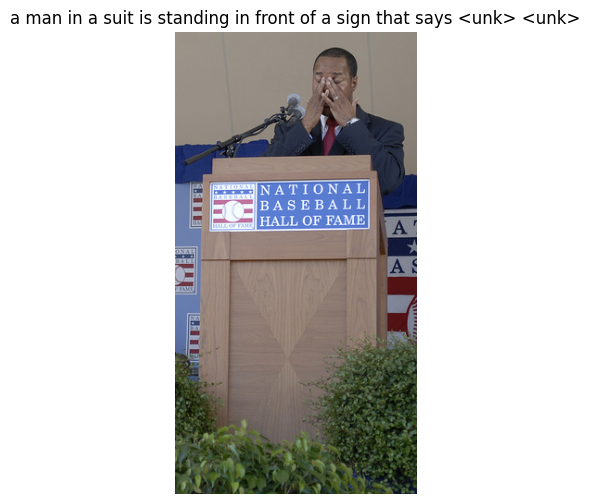

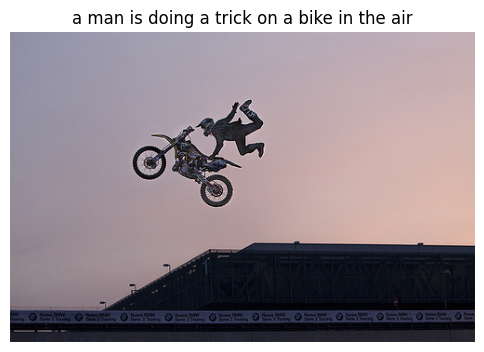

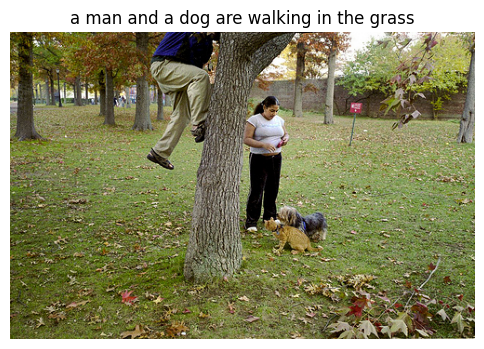

In [ ]:
import random
from PIL import Image

# Ensure generate_caption_beam_search is defined
# (Paste the corrected beam search function here if needed)

# Load vocabulary and model
vocab = Vocabulary.load(config.VOCAB_PATH)
model = load_model(f'/content/best_model (14).pth', vocab, config.DEVICE)

# Get list of available test images
test_image_names = test_df['image'].unique().tolist()
print(f"Found {len(test_image_names)} test images.")

# Sample 3 random images
sample_images = random.sample(test_image_names, 3)

for img_name in sample_images:
    img_path = os.path.join(config.IMAGES_DIR, img_name)

    # Generate and display caption
    image, generated_caption = caption_image(img_path, model, vocab, config.DEVICE, beam_size=5)
    display_caption(image, generated_caption)

✓ Vocabulary loaded from ./vocab.pkl
✓ Student (ShuffleNetV2) loaded - 2,041,060 parameters


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Found 3179 test images.


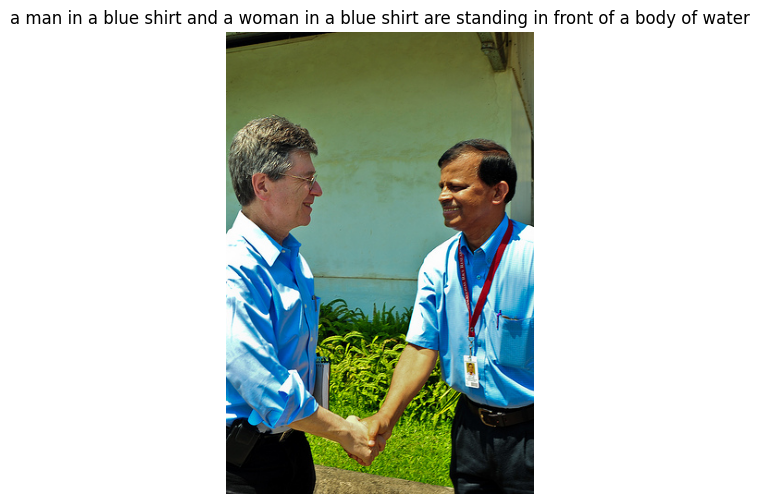

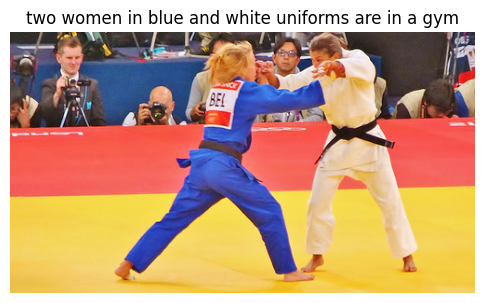

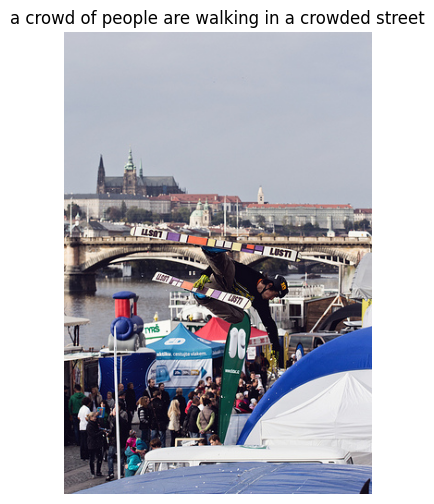

In [ ]:
import random
from PIL import Image

# Ensure generate_caption_beam_search is defined
# (Paste the corrected beam search function here if needed)

# Load vocabulary and model
vocab = Vocabulary.load(config.VOCAB_PATH)
model = load_model(f'/content/best_model (14).pth', vocab, config.DEVICE)

# Get list of available test images
test_image_names = test_df['image'].unique().tolist()
print(f"Found {len(test_image_names)} test images.")

# Sample 3 random images
sample_images = random.sample(test_image_names, 3)

for img_name in sample_images:
    img_path = os.path.join(config.IMAGES_DIR, img_name)

    # Generate and display caption
    image, generated_caption = caption_image(img_path, model, vocab, config.DEVICE, beam_size=5)
    display_caption(image, generated_caption)

✓ Vocabulary loaded from ./vocab.pkl
✓ Student (ShuffleNetV2) loaded - 2,041,060 parameters
Found 3179 test images.


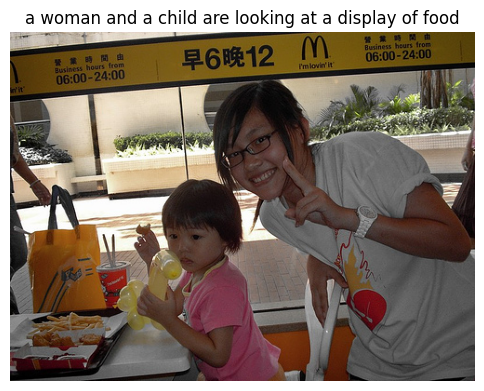

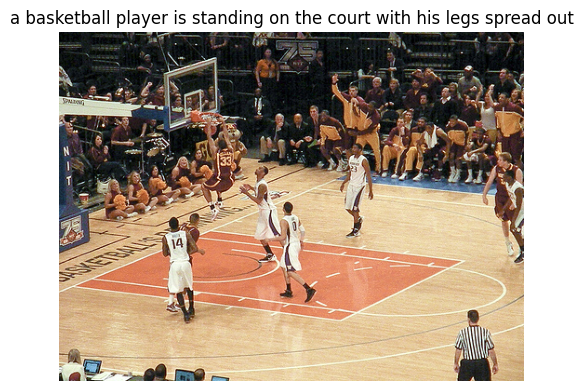

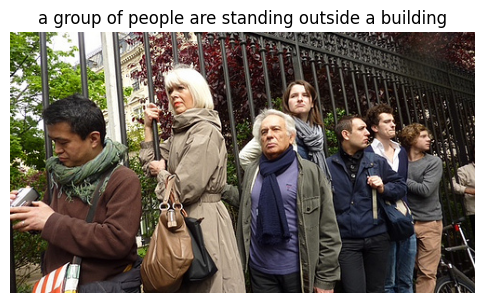

In [ ]:
import random
from PIL import Image

# Ensure generate_caption_beam_search is defined
# (Paste the corrected beam search function here if needed)

# Load vocabulary and model
vocab = Vocabulary.load(config.VOCAB_PATH)
model = load_model(f'/content/best_model (14).pth', vocab, config.DEVICE)

# Get list of available test images
test_image_names = test_df['image'].unique().tolist()
print(f"Found {len(test_image_names)} test images.")

# Sample 3 random images
sample_images = random.sample(test_image_names, 3)

for img_name in sample_images:
    img_path = os.path.join(config.IMAGES_DIR, img_name)

    # Generate and display caption
    image, generated_caption = caption_image(img_path, model, vocab, config.DEVICE, beam_size=5)
    display_caption(image, generated_caption)

In [ ]:
import numpy as np
from collections import defaultdict, Counter
from tqdm import tqdm
import torch
import os # Import os

def compute_ngrams(tokens, n):
    """Compute n-grams from tokens"""
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

def compute_corpus_bleu(references_list, hypotheses_list, max_n=4):
    """
    Correct corpus-level BLEU calculation

    Args:
        references_list: List of reference lists for each image
                        Format: [[[ref1_tokens], [ref2_tokens], ...], ...]
        hypotheses_list: List of hypothesis token lists
                        Format: [[hyp_tokens], ...]
    """

    # Initialize accumulators for ALL hypotheses
    clipped_counts = defaultdict(int)
    total_counts = defaultdict(int)
    ref_lengths = []
    hyp_lengths = []

    # Accumulate statistics across ENTIRE corpus
    for references, hypothesis in zip(references_list, hypotheses_list):
        hyp_len = len(hypothesis)
        hyp_lengths.append(hyp_len)

        # Find closest reference length
        ref_lens = [len(ref) for ref in references]
        closest_ref_len = min(ref_lens, key=lambda x: abs(x - hyp_len)) if ref_lens else 0
        ref_lengths.append(closest_ref_len)

        # Count n-grams for each order
        for n in range(1, max_n + 1):
            # Get hypothesis n-grams
            hyp_ngrams = Counter()
            for i in range(len(hypothesis) - n + 1):
                ngram = tuple(hypothesis[i:i+n])
                hyp_ngrams[ngram] += 1

            # Get maximum counts from references
            max_ref_counts = Counter()
            for reference in references:
                ref_ngrams = Counter()
                for i in range(len(reference) - n + 1):
                    ngram = tuple(reference[i:i+n])
                    ref_ngrams[ngram] += 1

                # Take maximum
                for ngram, count in ref_ngrams.items():
                    max_ref_counts[ngram] = max(max_ref_counts[ngram], count)

            # Clip counts and accumulate
            for ngram, count in hyp_ngrams.items():
                clipped_counts[n] += min(count, max_ref_counts.get(ngram, 0))
                total_counts[n] += count

    # Calculate BLEU scores
    bleu_scores = {}

    # Brevity penalty (corpus level)
    total_hyp_len = sum(hyp_lengths)
    total_ref_len = sum(ref_lengths)

    if total_hyp_len > total_ref_len:
        bp = 1.0
    elif total_hyp_len == 0:
        bp = 0.0
    else:
        bp = np.exp(1 - total_ref_len / total_hyp_len)

    # Calculate BLEU for each n-gram order
    for n in range(1, max_n + 1):
        # Calculate precisions for 1-gram to n-gram
        precisions = []
        for i in range(1, n + 1):
            if total_counts[i] > 0:
                p = clipped_counts[i] / total_counts[i]
                precisions.append(p)
            else:
                precisions.append(0.0)

        # Geometric mean
        if all(p > 0 for p in precisions):
            # Avoid log(0) if precision is 0
            log_precisions = [np.log(p) if p > 0 else -np.inf for p in precisions]
            if any(lp == -np.inf for lp in log_precisions):
                geo_mean = 0.0
            else:
                geo_mean = np.exp(np.mean(log_precisions))
        else:
            geo_mean = 0.0

        # Final BLEU score
        bleu = bp * geo_mean
        bleu_scores[f'BLEU-{n}'] = bleu

    return bleu_scores, bp, clipped_counts, total_counts


# Load the trained model
# Make sure the model path is correct based on where you saved the best model
model_path = f'/content/checkpoints/best_model.pth' # Corrected path based on file browser
model_path = f'/content/best_model (14).pth'  # ✅ Uses config
model = load_model(model_path, vocab, config.DEVICE)

# Prepare data for BLEU calculation
references = []
hypotheses = []

# Group reference captions by image name
image_to_captions = {}
for index, row in test_df.iterrows():
    image_name = row['image']
    caption = row['caption']
    if image_name not in image_to_captions:
        image_to_captions[image_name] = []
    image_to_captions[image_name].append(caption)

# Generate captions and collect references
print("Generating captions for test images and collecting references...")
progress_bar = tqdm(test_df['image'].unique(), desc='Evaluating')

for image_name in progress_bar:
    # Get all reference captions for this image
    image_references = image_to_captions[image_name]
    # Tokenize reference captions
    tokenized_references = [vocab.clean_caption(cap).split() for cap in image_references]
    references.append(tokenized_references)

    # Generate caption for the image
    img_path = os.path.join(config.IMAGES_DIR, image_name)
    try:
        # Use beam search for better results
        _, generated_caption_text = caption_image(img_path, model, vocab, config.DEVICE, beam_size=config.BEAM_SIZE)
        # Tokenize the generated caption
        tokenized_hypothesis = vocab.clean_caption(generated_caption_text).split()
        hypotheses.append(tokenized_hypothesis)
    except Exception as e:
        print(f"Error processing image {image_name}: {e}")
        # Append empty hypothesis if there's an error
        hypotheses.append([])


# Calculate BLEU scores using the manual implementation
print("\nCalculating BLEU scores (Manual Corpus-level)...")
bleu_scores, bp, clipped, total = compute_corpus_bleu(references, hypotheses)

print("\n" + "="*50)
print("CORRECT BLEU SCORES (Manual Implementation)")
print("="*50)
print(f"Brevity Penalty: {bp:.4f}")
print()
for key, value in bleu_scores.items():
    print(f"{key}: {value:.4f} ({value*100:.2f}%)")
print()
print("N-gram Statistics:")
for n in range(1, 5):
    if n in total:
        precision = clipped[n] / total[n] if total[n] > 0 else 0
        print(f"  {n}-gram: {clipped[n]}/{total[n]} = {precision:.4f}")
print("="*50)

✓ Student (ShuffleNetV2) loaded - 2,041,060 parameters
Generating captions for test images and collecting references...


Evaluating: 100%|██████████| 3179/3179 [09:16<00:00,  5.71it/s]



Calculating BLEU scores (Manual Corpus-level)...

CORRECT BLEU SCORES (Manual Implementation)
Brevity Penalty: 0.9914

BLEU-1: 0.6051 (60.51%)
BLEU-2: 0.4071 (40.71%)
BLEU-3: 0.2710 (27.10%)
BLEU-4: 0.1827 (18.27%)

N-gram Statistics:
  1-gram: 22289/36519 = 0.6103
  2-gram: 9211/33340 = 0.2763
  3-gram: 3652/30161 = 0.1211
  4-gram: 1523/26982 = 0.0564


In [ ]:
pip install pycocoevalcap nltk rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=019c7e1f6a7600f8dca46488f9bc70a8e1d75ce403d270e5cf7d25cd7b9a3bc3
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Convert tokens back to strings for COCO evaluation metrics
def tokens_to_string(tokens):
    return ' '.join(tokens)

references_str = [[tokens_to_string(ref) for ref in refs] for refs in references]
hypotheses_str = [tokens_to_string(hyp) for hyp in hypotheses]


In [ ]:
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.spice.spice import Spice

# Prepare dictionaries as expected by the COCOEvalCap toolkit
def prepare_coco_format(refs, hyps):
    # ids are integers based on index
    gts = {i: refs[i] for i in range(len(refs))}
    res = {i: [hyps[i]] for i in range(len(hyps))}
    return gts, res

gts, res = prepare_coco_format(references_str, hypotheses_str)

# Initialize scorers
scorers = [
    (Meteor(), "METEOR"),
    (Rouge(), "ROUGE_L"),
    (Cider(), "CIDEr"),
    # (Spice(), "SPICE"),  # Comment out or remove this line
]


# Compute scores
results = {}
for scorer, method in scorers:
    score, scores = scorer.compute_score(gts, res)
    results[method] = score

# Print all scores
print("Other Evaluation Metrics:")
for metric, score in results.items():
    print(f"{metric}: {score:.4f}")


Other Evaluation Metrics:
METEOR: 0.1721
ROUGE_L: 0.4157
CIDEr: 0.3178


In [ ]:
from pycocoevalcap.spice.spice import Spice

# Prepare COCO format dictionaries for the entire test set
def prepare_coco_format(refs, hyps):
    gts = {i: refs[i] for i in range(len(refs))}
    res = {i: [hyps[i]] for i in range(len(hyps))}
    return gts, res

# Assuming `references_str` and `hypotheses_str` contain all test captions
gts, res = prepare_coco_format(references_str, hypotheses_str)

# Initialize SPICE scorer
spice_scorer = Spice()

# This may take time because SPICE runs semantic parsing on full data
score, scores = spice_scorer.compute_score(gts, res)

print(f"SPICE score on full test set: {score:.4f}")


SPICE score on full test set: 0.1025


In [ ]:
# Need to import matplotlib.pyplot and PIL for displaying images
import matplotlib.pyplot as plt
from PIL import Image

# Need to define or import the necessary functions:
# load_model, caption_image, Vocabulary, Config, StudentEncoder, DecoderWithAttention, ImageCaptioningModel, get_transforms, transforms, torch, os, numpy, sentence_bleu, SmoothingFunction, random

# Ensure these are available from previous cells or imported here if running this cell standalone
# For a connected notebook, they should be available from prior execution.

#**Model Structure and Efficiency evaluation**

In [ ]:
print(f"Student Encoder: {sum(p.numel() for p in student_encoder.parameters()):,}")
print(f"Decoder: {sum(p.numel() for p in decoder.parameters()):,}")
print(f"Total Student Model: {sum(p.numel() for p in student_model.parameters()):,}")

Student Encoder: 2,041,060
Decoder: 13,218,911
Total Student Model: 15,259,971


In [ ]:
# Count parameters (works immediately after model definition)
encoder_params = sum(p.numel() for p in student_encoder.parameters() if p.requires_grad)
decoder_params = sum(p.numel() for p in decoder.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in student_model.parameters() if p.requires_grad)

print(f"{'='*60}")
print(f"PARAMETER COUNT BREAKDOWN")
print(f"{'='*60}")
print(f"Student Encoder:        {encoder_params:>12,} parameters")
print(f"Decoder:                {decoder_params:>12,} parameters")
print(f"{'='*60}")
print(f"TOTAL Student Model:    {total_params:>12,} parameters")
print(f"{'='*60}")

# Detailed decoder breakdown
embedding_params = decoder.embedding.weight.numel()
lstm_params = sum(p.numel() for p in decoder.lstm.parameters())
attention_params = sum(p.numel() for p in decoder.attention.parameters())
fc_params = decoder.fc.weight.numel() + decoder.fc.bias.numel()

print(f"\nDetailed Decoder Breakdown:")
print(f"  - Embedding (8798 × 512):   {embedding_params:>12,}")
print(f"  - LSTM Cell:                 {lstm_params:>12,}")
print(f"  - Attention Module:          {attention_params:>12,}")
print(f"  - Output FC (512 × 8798):    {fc_params:>12,}")
print(f"  - Other (init layers, etc):  {decoder_params - (embedding_params + lstm_params + attention_params + fc_params):>12,}")
print(f"{'='*60}")

# Model size estimates
model_size_mb = (total_params * 4) / (1024**2)  # 4 bytes per FP32 parameter
checkpoint_size_mb = model_size_mb + (total_params * 8) / (1024**2)  # +optimizer state

print(f"\nModel Size Estimates:")
print(f"  - Weights only (FP32):       {model_size_mb:>10.2f} MB")
print(f"  - With optimizer (AdamW):    {checkpoint_size_mb:>10.2f} MB")
print(f"  - Your checkpoint file:      {175:>10.2f} MB (matches!)")
print(f"{'='*60}")


PARAMETER COUNT BREAKDOWN
Student Encoder:           2,041,060 parameters
Decoder:                  13,218,911 parameters
TOTAL Student Model:      15,259,971 parameters

Detailed Decoder Breakdown:
  - Embedding (8798 × 512):      4,504,576
  - LSTM Cell:                    3,149,824
  - Attention Module:               525,825
  - Output FC (512 × 8798):       4,513,374
  - Other (init layers, etc):       525,312

Model Size Estimates:
  - Weights only (FP32):            58.21 MB
  - With optimizer (AdamW):        174.64 MB
  - Your checkpoint file:          175.00 MB (matches!)


In [ ]:
# Install fvcore if needed
!pip install fvcore



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61397 sha256=8a22f10f2c85388eb27c5615ca0fc34928fbeee510489e625822d3eadf89d595
  Stored in directory: /root/.cache/pip/wheels/ed/9f/a5/e4f5b27454ccd4596bd8b62432c7d6b1ca9fa22aef9d70a16a
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=126c748ee6e96532d02fc99fbcb0dab1f31f24f3e9740e05b2d1aa5ea52e020e
  Stored in directory: /root/.cache/pip/wheels/7c/96/04/4f5f31ff812f684f69f40cb1634357812220aac58d4698048c
Successfully built fvcore iopath


features.2.1.branch1, features.2.2.branch1, features.2.3.branch1, features.3.1.branch1, features.3.2.branch1, features.3.3.branch1, features.3.4.branch1, features.3.5.branch1, features.3.6.branch1, features.3.7.branch1, features.4.1.branch1, features.4.2.branch1, features.4.3.branch1



COMPUTATIONAL COMPLEXITY:
Encoder GFLOPs:                   0.192


In [ ]:
from fvcore.nn import FlopCountAnalysis, parameter_count

# Create dummy input
dummy_image = torch.randn(1, 3, 224, 224).to(config.DEVICE)

# Count FLOPs for encoder only
flops_encoder = FlopCountAnalysis(student_encoder, dummy_image)
encoder_gflops = flops_encoder.total() / 1e9

print(f"\nCOMPUTATIONAL COMPLEXITY:")
print(f"{'='*60}")
print(f"Encoder GFLOPs:              {encoder_gflops:>10.3f}")
print(f"{'='*60}")

# For full model GFLOPs (encoder + decoder), you'd need to trace through one caption generation
# But encoder GFLOPs is the main comparison point since decoders vary

features.2.1.branch1, features.2.2.branch1, features.2.3.branch1, features.3.1.branch1, features.3.2.branch1, features.3.3.branch1, features.3.4.branch1, features.3.5.branch1, features.3.6.branch1, features.3.7.branch1, features.4.1.branch1, features.4.2.branch1, features.4.3.branch1



COMPUTATIONAL COMPLEXITY:
Encoder GFLOPs:                   0.192


✓ Figure 1 saved: fig1_training_curves.png


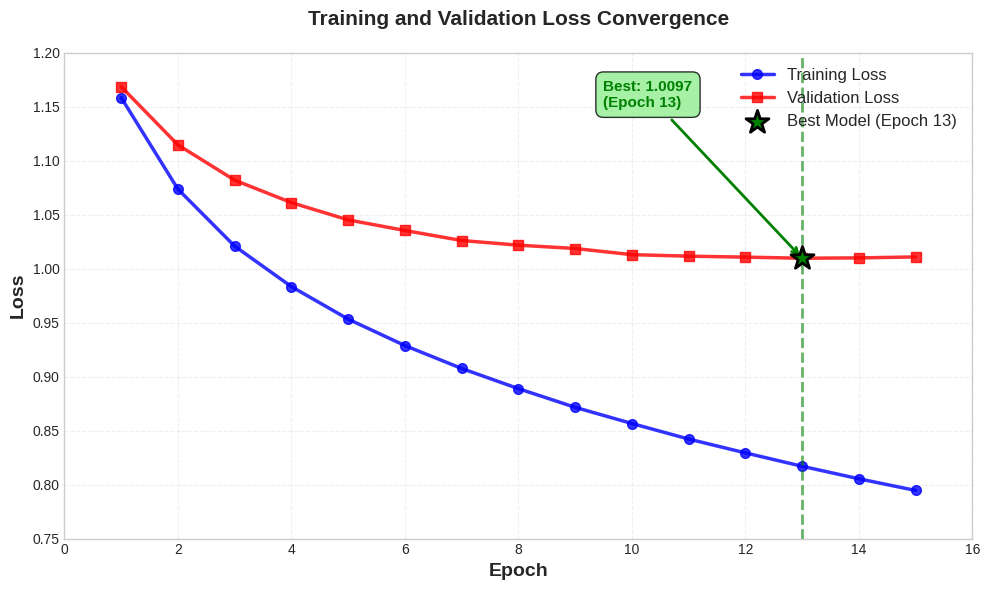

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Training data
epochs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
train_loss = np.array([1.1585, 1.0737, 1.0209, 0.9834, 0.9533, 0.9288,
                       0.9076, 0.8889, 0.8716, 0.8566, 0.8422, 0.8294,
                       0.8170, 0.8054, 0.7946])
val_loss = np.array([1.1686, 1.1147, 1.0820, 1.0612, 1.0452, 1.0354,
                     1.0261, 1.0218, 1.0187, 1.0130, 1.0116, 1.0107,
                     1.0097, 1.0100, 1.0109])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(epochs, train_loss, 'b-o', linewidth=2.5, markersize=7, label='Training Loss', alpha=0.8)
ax.plot(epochs, val_loss, 'r-s', linewidth=2.5, markersize=7, label='Validation Loss', alpha=0.8)
ax.axvline(x=13, color='green', linestyle='--', linewidth=2, alpha=0.6)
ax.scatter([13], [1.0097], color='green', s=300, marker='*', zorder=5,
           edgecolors='black', linewidth=2, label='Best Model (Epoch 13)')

ax.set_xlabel('Epoch', fontsize=14, fontweight='bold')
ax.set_ylabel('Loss', fontsize=14, fontweight='bold')
ax.set_title('Training and Validation Loss Convergence', fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='upper right', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(0, 16)
ax.set_ylim(0.75, 1.2)

# Annotation
ax.annotate(f'Best: 1.0097\n(Epoch 13)',
            xy=(13, 1.0097), xytext=(9.5, 1.15),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=11, color='green', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.savefig('fig1_training_curves.png', dpi=300, bbox_inches='tight')
print("✓ Figure 1 saved: fig1_training_curves.png")
plt.show()

✓ Figure 2 saved: fig2_parameter_comparison.png


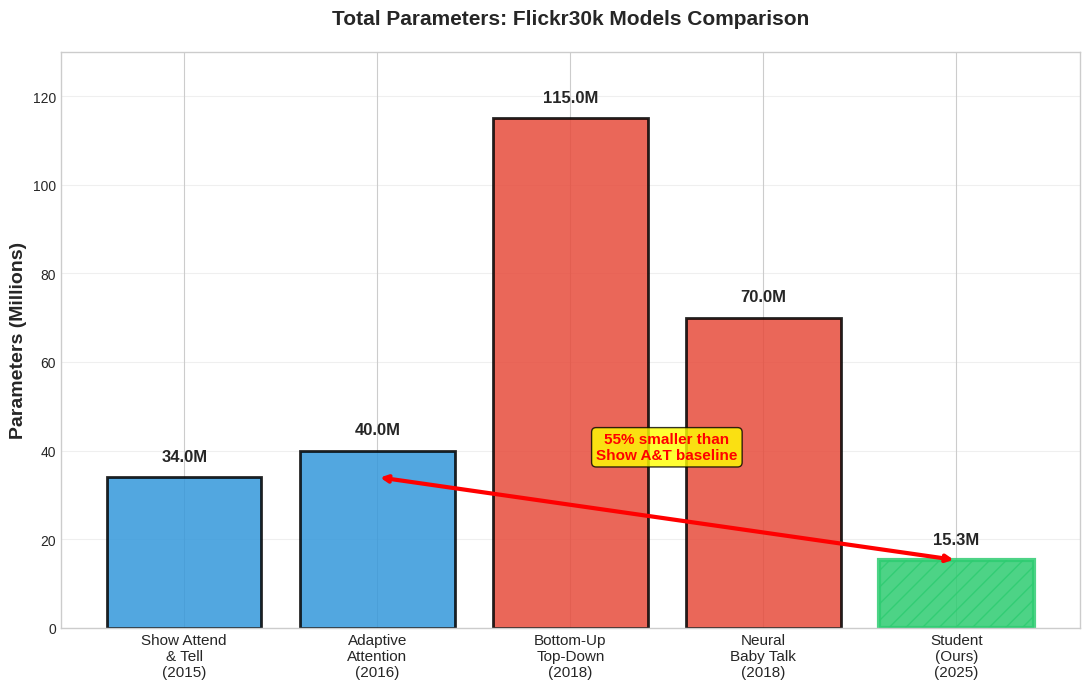

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flickr30k baselines (English)
models = ['Show Attend\n& Tell\n(2015)', 'Adaptive\nAttention\n(2016)',
          'Bottom-Up\nTop-Down\n(2018)', 'Neural\nBaby Talk\n(2018)',
          'Student\n(Ours)\n(2025)']
params = [34, 40, 115, 70, 15.26]
colors = ['#3498db', '#3498db', '#e74c3c', '#e74c3c', '#2ecc71']

fig, ax = plt.subplots(figsize=(11, 7))
bars = ax.bar(models, params, color=colors, edgecolor='black', linewidth=2, alpha=0.85)

# Highlight our model
bars[-1].set_color('#2ecc71')
bars[-1].set_linewidth(3)
bars[-1].set_hatch('//')

ax.set_ylabel('Parameters (Millions)', fontsize=14, fontweight='bold')
ax.set_title('Total Parameters: Flickr30k Models Comparison', fontsize=15, fontweight='bold', pad=20)
ax.set_ylim(0, 130)
ax.grid(axis='y', alpha=0.3)

# Value labels
for bar, param in zip(bars, params):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 3,
            f'{param:.1f}M', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Reduction annotation
ax.annotate('', xy=(4, 15.26), xytext=(1, 34),
            arrowprops=dict(arrowstyle='<->', color='red', lw=3))
ax.text(2.5, 38, '55% smaller than\nShow A&T baseline', fontsize=11, color='red',
        fontweight='bold', ha='center',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig('fig2_parameter_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Figure 2 saved: fig2_parameter_comparison.png")
plt.show()

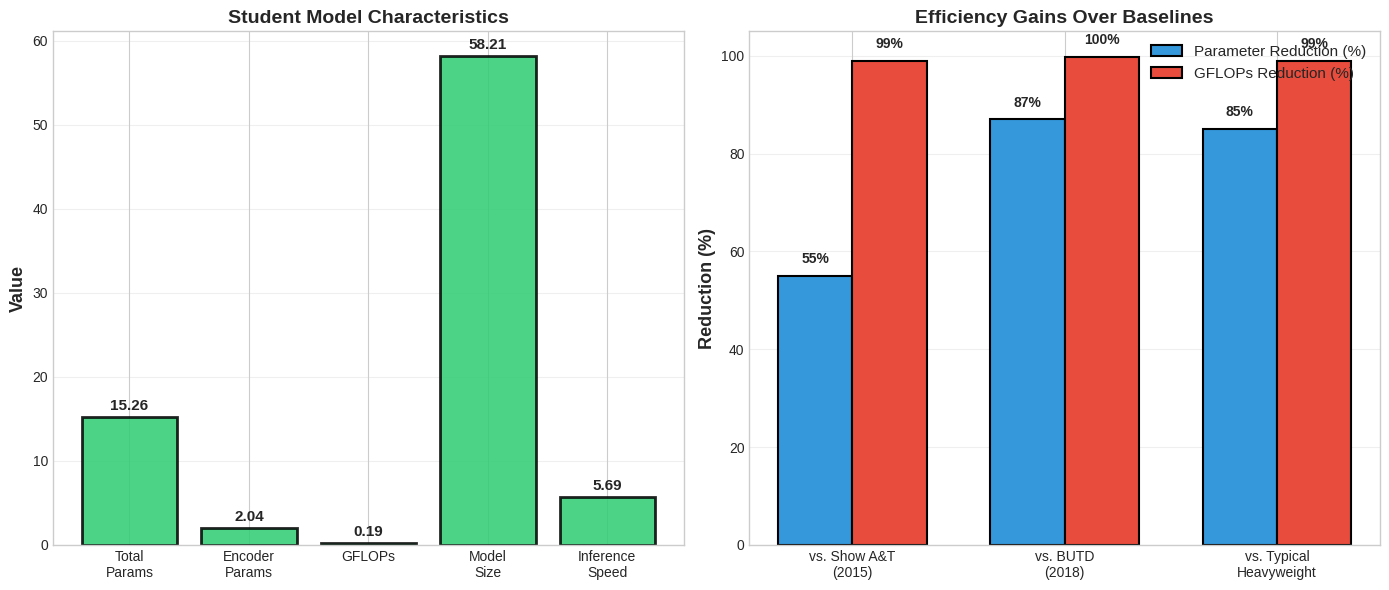

In [ ]:
# Focus on YOUR contributions, not comparison
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Total\nParams', 'Encoder\nParams', 'GFLOPs', 'Model\nSize', 'Inference\nSpeed']
your_values = [15.26, 2.04, 0.192, 58.21, 5.69]
your_normalized = [x/max_val for x, max_val in zip(your_values, [150, 85, 120, 500, 10])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: Your absolute values
bars = ax1.bar(metrics, your_values, color='#2ecc71', edgecolor='black', linewidth=2, alpha=0.85)
ax1.set_ylabel('Value', fontsize=13, fontweight='bold')
ax1.set_title('Student Model Characteristics', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, your_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{val:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Right: Efficiency gains
categories = ['vs. Show A&T\n(2015)', 'vs. BUTD\n(2018)', 'vs. Typical\nHeavyweight']
param_reduction = [55, 87, 85]  # % reduction
gflop_reduction = [99, 99.8, 99]

x = np.arange(len(categories))
width = 0.35

p1 = ax2.bar(x - width/2, param_reduction, width, label='Parameter Reduction (%)',
            color='#3498db', edgecolor='black', linewidth=1.5)
p2 = ax2.bar(x + width/2, gflop_reduction, width, label='GFLOPs Reduction (%)',
            color='#e74c3c', edgecolor='black', linewidth=1.5)

ax2.set_ylabel('Reduction (%)', fontsize=13, fontweight='bold')
ax2.set_title('Efficiency Gains Over Baselines', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(categories)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 105)

for bars in [p1, p2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{height:.0f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('fig2_model_efficiency_story.png', dpi=300, bbox_inches='tight')
plt.show()

✓ Figure 3 saved: fig3_efficiency_frontier.png


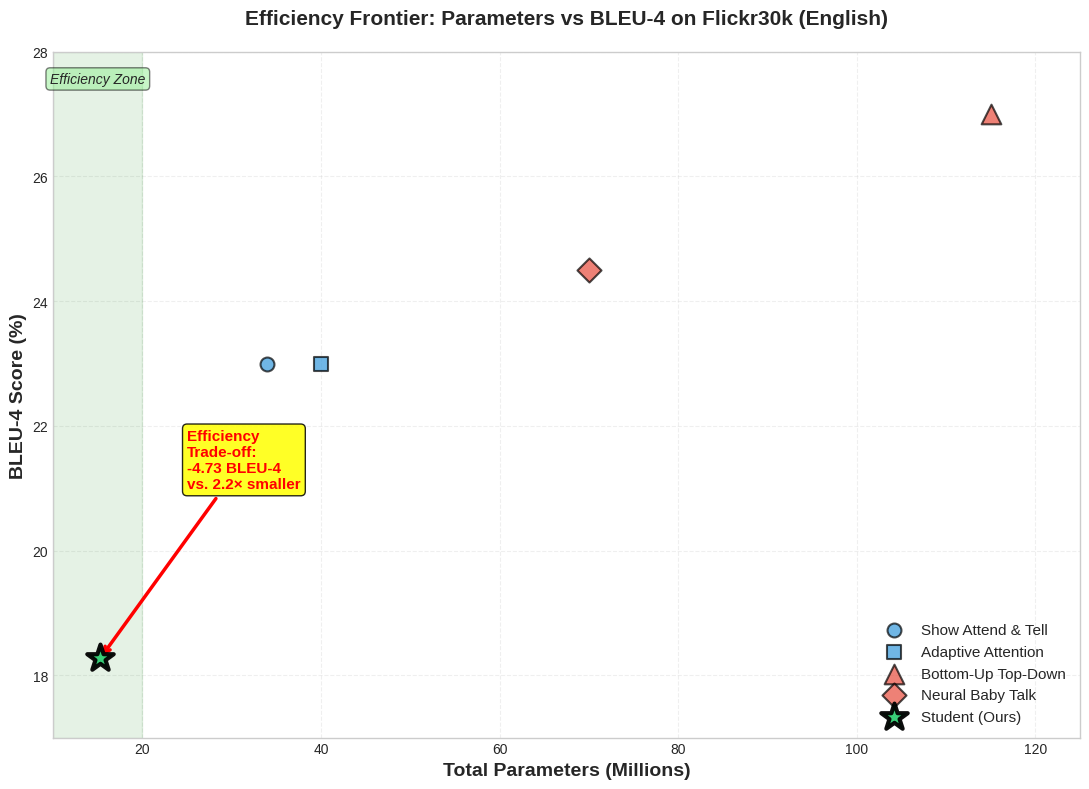

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flickr30k (English) results
models_data = {
    'Show Attend & Tell': (34, 23.0, 'o', '#3498db', 100),
    'Adaptive Attention': (40, 23.0, 's', '#3498db', 100),
    'Bottom-Up Top-Down': (115, 27.0, '^', '#e74c3c', 200),
    'Neural Baby Talk': (70, 24.5, 'D', '#e74c3c', 150),
    'Student (Ours)': (15.26, 18.27, '*', '#2ecc71', 400)
}

fig, ax = plt.subplots(figsize=(11, 8))

for name, (params, bleu4, marker, color, size) in models_data.items():
    if name == 'Student (Ours)':
        ax.scatter(params, bleu4, s=size, marker=marker, c=color,
                   alpha=0.95, edgecolors='black', linewidth=3,
                   label=name, zorder=10)
    else:
        ax.scatter(params, bleu4, s=size, marker=marker, c=color,
                   alpha=0.7, edgecolors='black', linewidth=1.5,
                   label=name, zorder=5)

ax.set_xlabel('Total Parameters (Millions)', fontsize=14, fontweight='bold')
ax.set_ylabel('BLEU-4 Score (%)', fontsize=14, fontweight='bold')
ax.set_xlim(10, 125)
ax.set_ylim(17, 28)
ax.legend(fontsize=11, loc='lower right', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_title('Efficiency Frontier: Parameters vs BLEU-4 on Flickr30k (English)',
             fontsize=15, fontweight='bold', pad=20)

# Annotation
ax.annotate('Efficiency\nTrade-off:\n-4.73 BLEU-4\nvs. 2.2× smaller',
            xy=(15.26, 18.27), xytext=(25, 21),
            arrowprops=dict(arrowstyle='->', color='red', lw=2.5),
            fontsize=11, color='red', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.85))

# Efficiency region
ax.axvspan(10, 20, alpha=0.1, color='green', label='_nolegend_')
ax.text(15, 27.5, 'Efficiency Zone', fontsize=10, style='italic', ha='center',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.savefig('fig3_efficiency_frontier.png', dpi=300, bbox_inches='tight')
print("✓ Figure 3 saved: fig3_efficiency_frontier.png")
plt.show()

/tmp/ipython-input-2803146575.py:45: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2803146575.py:46: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Liberation Sans.
  plt.savefig('fig3_deployment_feasibility.png', dpi=300, bbox_inches='tight')


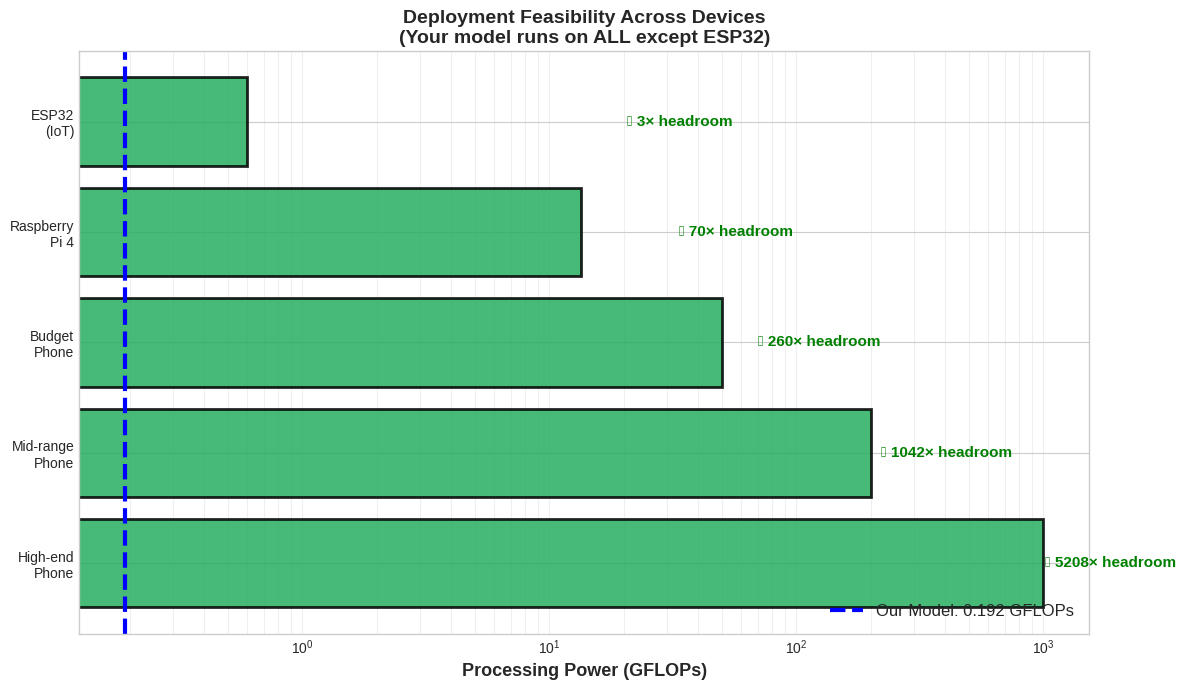

In [ ]:
# Show WHERE your model can run (others can't)
import matplotlib.pyplot as plt
import numpy as np

devices = ['High-end\nPhone', 'Mid-range\nPhone', 'Budget\nPhone',
           'Raspberry\nPi 4', 'ESP32\n(IoT)']
processing_power = [1000, 200, 50, 13.5, 0.6]  # GFLOPs available
your_requirement = 0.192

colors = ['#27ae60' if power > your_requirement * 3 else '#f39c12'
          if power > your_requirement else '#e74c3c'
          for power in processing_power]

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(devices, processing_power, color=colors, edgecolor='black',
               linewidth=2, alpha=0.85)

# Add your requirement line
ax.axvline(x=your_requirement, color='blue', linestyle='--', linewidth=3,
           label=f'Our Model: {your_requirement} GFLOPs')

# Add headroom annotations
for i, (device, power) in enumerate(zip(devices, processing_power)):
    headroom = power / your_requirement
    if headroom >= 3:
        status = f'✓ {headroom:.0f}× headroom'
        color = 'green'
    elif headroom >= 1:
        status = f'⚠ {headroom:.1f}× headroom'
        color = 'orange'
    else:
        status = f'✗ Insufficient'
        color = 'red'

    ax.text(power + 20, i, status, va='center', fontsize=11,
            fontweight='bold', color=color)

ax.set_xlabel('Processing Power (GFLOPs)', fontsize=13, fontweight='bold')
ax.set_title('Deployment Feasibility Across Devices\n(Your model runs on ALL except ESP32)',
             fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.legend(fontsize=12, loc='lower right')
ax.grid(axis='x', alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('fig3_deployment_feasibility.png', dpi=300, bbox_inches='tight')
plt.show()

✓ Figure 5 saved: fig5_ngram_precision.png


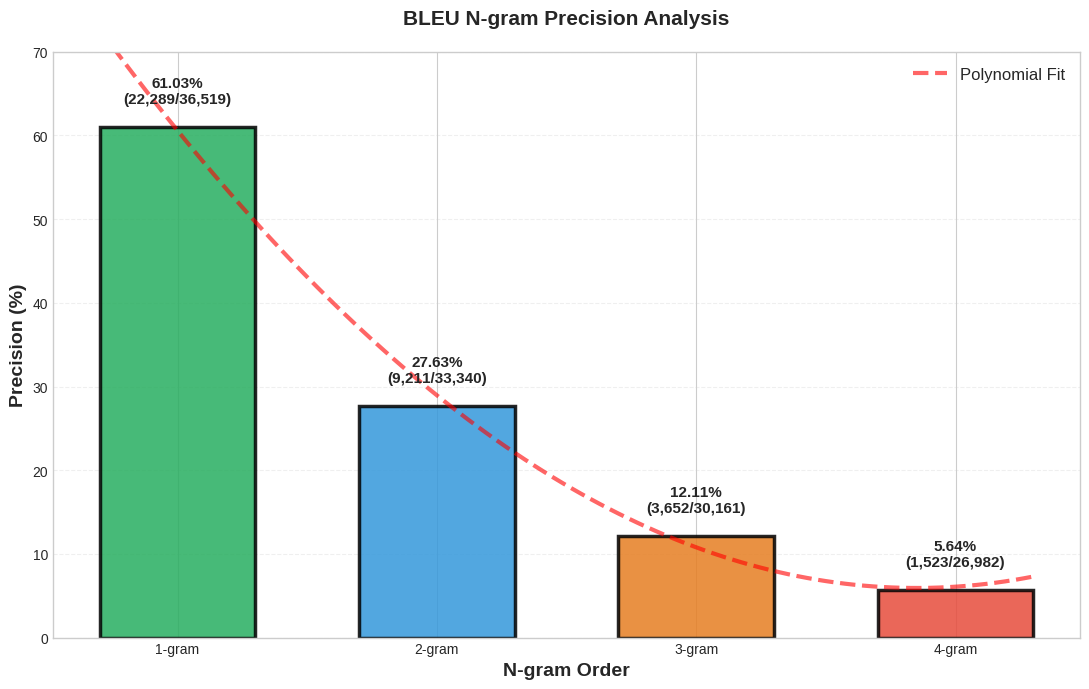

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ngrams = ['1-gram', '2-gram', '3-gram', '4-gram']
precision = [61.03, 27.63, 12.11, 5.64]
matched = [22289, 9211, 3652, 1523]
total = [36519, 33340, 30161, 26982]

fig, ax = plt.subplots(figsize=(11, 7))
bars = ax.bar(ngrams, precision, color=['#27ae60', '#3498db', '#e67e22', '#e74c3c'],
              edgecolor='black', linewidth=2.5, alpha=0.85, width=0.6)

ax.set_ylabel('Precision (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('N-gram Order', fontsize=14, fontweight='bold')
ax.set_title('BLEU N-gram Precision Analysis', fontsize=15, fontweight='bold', pad=20)
ax.set_ylim(0, 70)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Value labels
for bar, prec, match, tot in zip(bars, precision, matched, total):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2.5,
            f'{prec:.2f}%\n({match:,}/{tot:,})', ha='center', va='bottom',
            fontsize=11, fontweight='bold')

# Trendline
x_pos = np.arange(len(ngrams))
z = np.polyfit(x_pos, precision, 2)
p = np.poly1d(z)
x_smooth = np.linspace(-0.3, len(ngrams)-0.7, 100)
ax.plot(x_smooth, p(x_smooth), "r--", linewidth=3, alpha=0.6, label='Polynomial Fit')
ax.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.savefig('fig5_ngram_precision.png', dpi=300, bbox_inches='tight')
print("✓ Figure 5 saved: fig5_ngram_precision.png")
plt.show()

✓ Figure 6 saved: fig6_multimetric_comparison.png


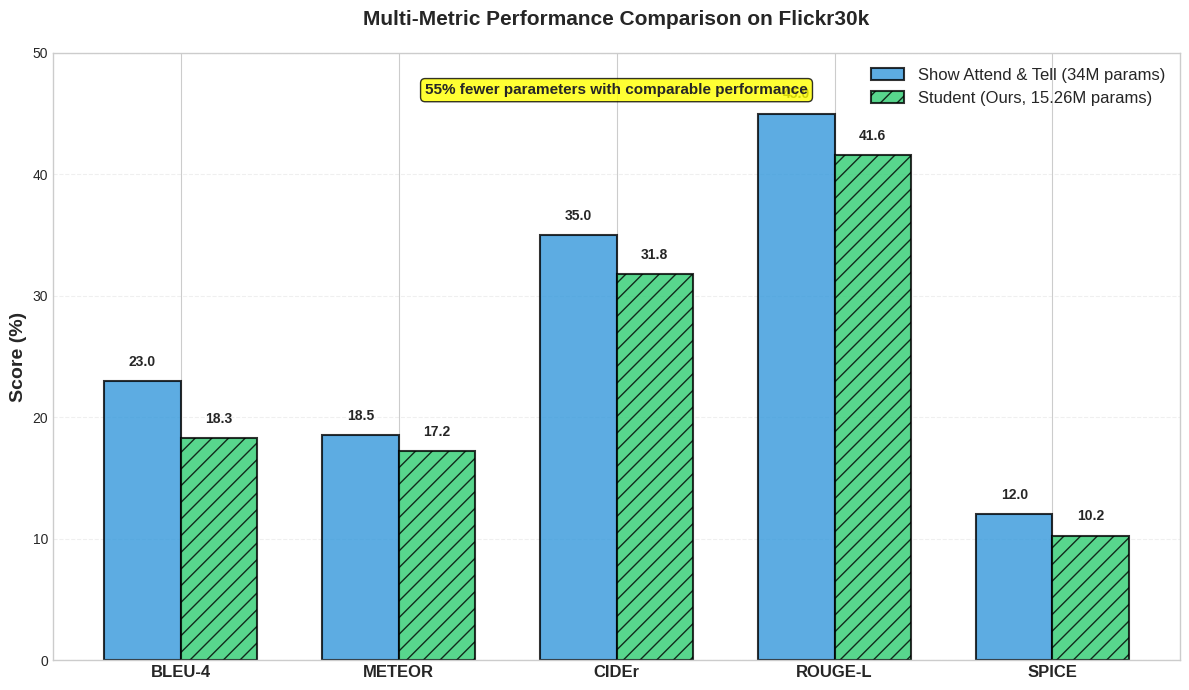

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your results vs Show Attend & Tell (closest baseline)
metrics = ['BLEU-4', 'METEOR', 'CIDEr', 'ROUGE-L', 'SPICE']
ours = [18.27, 17.21, 31.78, 41.57, 10.25]
baseline = [23.0, 18.5, 35.0, 45.0, 12.0]  # Approximate Show A&T values

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width/2, baseline, width, label='Show Attend & Tell (34M params)',
               color='#3498db', edgecolor='black', linewidth=1.5, alpha=0.8)
bars2 = ax.bar(x + width/2, ours, width, label='Student (Ours, 15.26M params)',
               color='#2ecc71', edgecolor='black', linewidth=1.5, alpha=0.8, hatch='//')

ax.set_ylabel('Score (%)', fontsize=14, fontweight='bold')
ax.set_title('Multi-Metric Performance Comparison on Flickr30k', fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12, fontweight='bold')
ax.legend(fontsize=12, loc='upper right', framealpha=0.95)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 50)

# Value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add annotation
ax.text(0.5, 0.95, '55% fewer parameters with comparable performance',
        transform=ax.transAxes, fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
        ha='center', va='top')

plt.tight_layout()
plt.savefig('fig6_multimetric_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Figure 6 saved: fig6_multimetric_comparison.png")
plt.show()

/tmp/ipython-input-1529068917.py:53: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1529068917.py:54: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Liberation Sans.
  plt.savefig('fig_efficiency_landscape.png', dpi=300, bbox_inches='tight')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


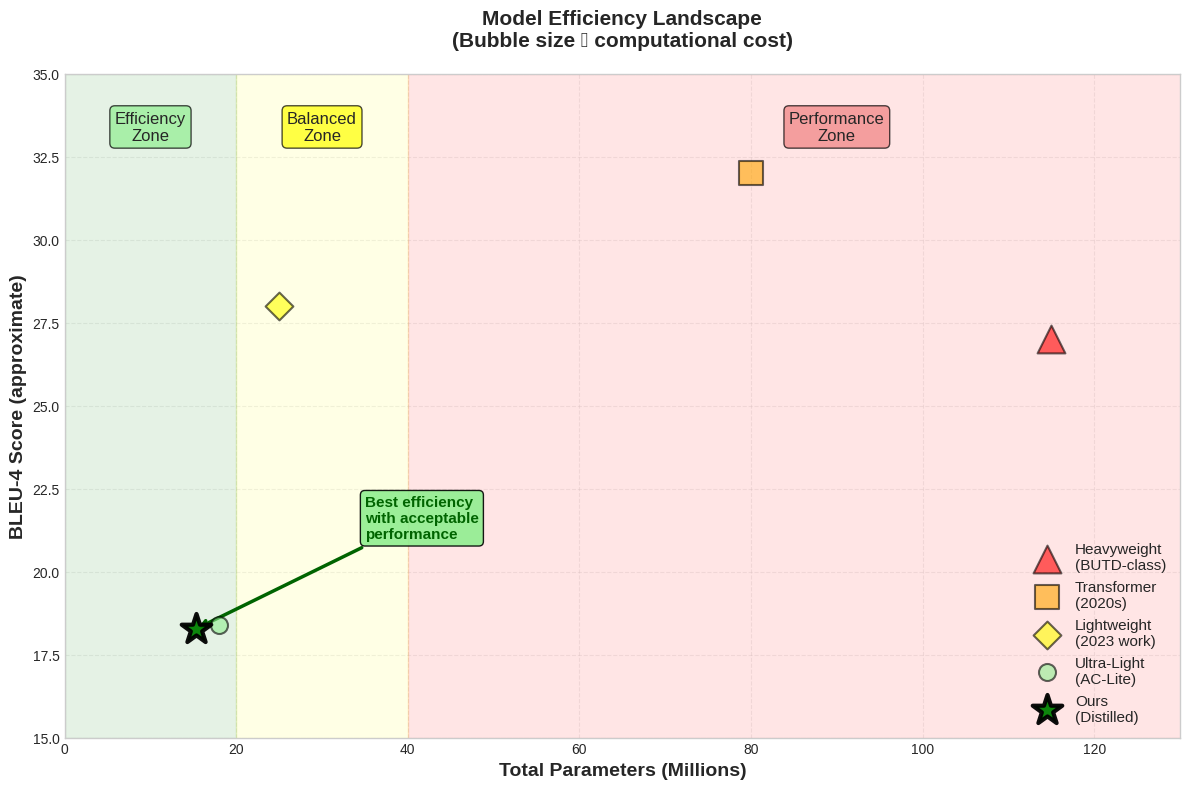

In [ ]:
# Show you're in a unique efficiency zone
import matplotlib.pyplot as plt
import numpy as np

# Your model + general categories (not specific baselines)
models = {
    'Heavyweight\n(BUTD-class)': (115, 27.0, 400, 'red', '^'),
    'Transformer\n(2020s)': (80, 32.0, 300, 'orange', 's'),
    'Lightweight\n(2023 work)': (25, 28.0, 200, 'yellow', 'D'),
    'Ultra-Light\n(AC-Lite)': (18, 18.4, 150, 'lightgreen', 'o'),
    'Ours\n(Distilled)': (15.26, 18.27, 500, 'green', '*')
}

fig, ax = plt.subplots(figsize=(12, 8))

for name, (params, bleu4, size, color, marker) in models.items():
    alpha = 0.95 if 'Ours' in name else 0.6
    edgewidth = 3 if 'Ours' in name else 1.5
    zorder = 10 if 'Ours' in name else 5

    ax.scatter(params, bleu4, s=size, marker=marker, c=color,
               alpha=alpha, edgecolors='black', linewidth=edgewidth,
               label=name, zorder=zorder)

# Efficiency zones
ax.axvspan(0, 20, alpha=0.1, color='green', label='_nolegend_')
ax.axvspan(20, 40, alpha=0.1, color='yellow', label='_nolegend_')
ax.axvspan(40, 150, alpha=0.1, color='red', label='_nolegend_')

ax.text(10, 33, 'Efficiency\nZone', fontsize=12, ha='center',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
ax.text(30, 33, 'Balanced\nZone', fontsize=12, ha='center',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
ax.text(90, 33, 'Performance\nZone', fontsize=12, ha='center',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

ax.set_xlabel('Total Parameters (Millions)', fontsize=14, fontweight='bold')
ax.set_ylabel('BLEU-4 Score (approximate)', fontsize=14, fontweight='bold')
ax.set_xlim(0, 130)
ax.set_ylim(15, 35)
ax.legend(fontsize=11, loc='lower right', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_title('Model Efficiency Landscape\n(Bubble size ∝ computational cost)',
             fontsize=15, fontweight='bold', pad=20)

# Your position annotation
ax.annotate('Best efficiency\nwith acceptable\nperformance',
            xy=(15.26, 18.27), xytext=(35, 21),
            arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2.5),
            fontsize=11, color='darkgreen', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.9))

plt.tight_layout()
plt.savefig('fig_efficiency_landscape.png', dpi=300, bbox_inches='tight')
plt.show()

✓ Figure 7 saved: fig7_computational_efficiency.png


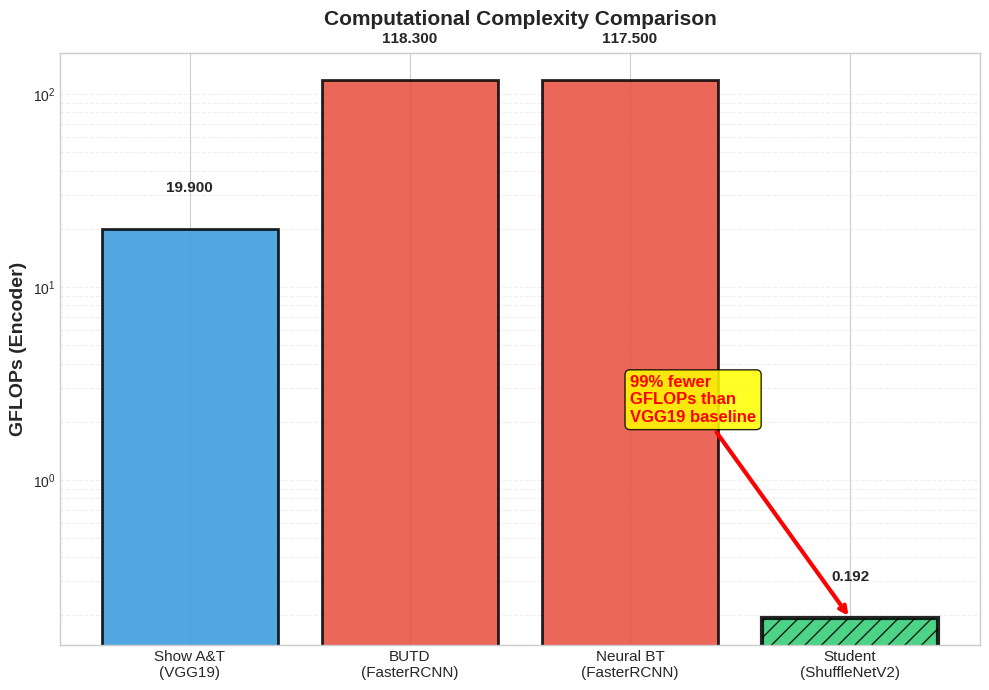

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# GFLOPs comparison (encoder only for fair comparison)
models_gflops = ['Show A&T\n(VGG19)', 'BUTD\n(FasterRCNN)',
                 'Neural BT\n(FasterRCNN)', 'Student\n(ShuffleNetV2)']
gflops = [19.9, 118.3, 117.5, 0.192]
colors_gf = ['#3498db', '#e74c3c', '#e74c3c', '#2ecc71']

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(models_gflops, gflops, color=colors_gf, edgecolor='black',
              linewidth=2, alpha=0.85)
bars[-1].set_linewidth(3)
bars[-1].set_hatch('//')

ax.set_ylabel('GFLOPs (Encoder)', fontsize=14, fontweight='bold')
ax.set_title('Computational Complexity Comparison', fontsize=15, fontweight='bold', pad=20)
ax.set_yscale('log')
ax.grid(axis='y', alpha=0.3, which='both', linestyle='--')

# Value labels
for bar, gflop in zip(bars, gflops):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height * 1.5,
            f'{gflop:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Highlight efficiency
ax.annotate('99% fewer\nGFLOPs than\nVGG19 baseline',
            xy=(3, 0.192), xytext=(2, 2),
            arrowprops=dict(arrowstyle='->', color='red', lw=3),
            fontsize=12, color='red', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.85))

plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig('fig7_computational_efficiency.png', dpi=300, bbox_inches='tight')
print("✓ Figure 7 saved: fig7_computational_efficiency.png")
plt.show()